<h1 style="padding:15px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:300%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Body signal of smoking Analysis & Prediction
</h1>

<p style="text-align:center; margin-top: 20px;">
    <img src="https://i-cf65.ch-static.com/content/dam/cf-consumer-healthcare/paradontax/es_AR/assets/about-gum-disease/2.2.2_Causes_Smoking.jpg?auto=format" style='width: 300px; height: 300px; border: 1px solid #ddd;'>
</p>

<p style="text-align:justify; ">

Smoking is the act of inhaling and exhaling the smoke produced by burning tobacco. Tobacco smoke contains thousands of harmful chemicals, many of which are toxic and addictive. Smoking affects nearly every organ in the human body and is one of the leading causes of preventable diseases and deaths worldwide.<br>
<br>
People who smoke are at a significantly higher risk of developing serious health problems, including heart disease, stroke, respiratory illnesses, and various types of cancer. Although quitting smoking can be challenging, stopping at any age greatly reduces health risks. Over time, the body begins to heal, improving lung function, circulation, and overall quality of life.

</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px; margin:0; font-family:serif; font-size:130%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:500">Table Of Contents</p>

<div align="center">

| No | Contents | No | Contents |
|:---| :--- |:---| :---- |
| 1 | [Importing Libraries](#1) | 6 | [Correlation Analysis](#6) |
| 2 | [Dataset Overview](#2) | 7 | [Data Preprocessing](#7) |
| 3 | [Exploratory Data Analysis (EDA)](#3) | 8 | [Model Training](#8) |
| 4 | [Feature Visualization](#4) | 9 | [Performance Evaluation](#9) |
| 5 | [Feature Engineering](#5) | 10 | [Conclusions & Closing](#10) |

</div>
</div>

<div style="margin-top: 30px; padding: 15px; border: 1.5px solid #000000; border-radius: 20px; background-color: #ffffff; font-family: serif; color: #000000; text-align: center;">
    The dataset was shared by following link: 
    <a href="https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/data" style="color: #000000; font-weight: bold; text-decoration: underline;">[Click here to view dataset]</a>
</div>

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Importing Libraries
</p>

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
# To show all columns
pd.set_option('display.max_columns', 15)

<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Dataset Overview
</p>

In [69]:
data = pd.read_csv("data/smoking.csv")
df = data.copy()

In [70]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 27)
Glimpse of The Dataset :


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.300000,1.200000,1.000000,1.000000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,Y,0,Y,0
1,1,F,40,160,60,81.000000,0.800000,0.600000,1.000000,1.000000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,Y,0,Y,0
2,2,M,55,170,60,80.000000,0.800000,0.800000,1.000000,1.000000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,Y,0,N,1
3,3,M,40,165,70,88.000000,1.500000,1.500000,1.000000,1.000000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,Y,0,Y,0
4,4,F,40,155,60,86.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,Y,0,N,0


In [71]:
df = df.drop("ID", axis = 1)

df.rename(columns = {
    "height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
"waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
"eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
"hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
"Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
"Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
"AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
inplace = True)

In [72]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ld

In [73]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,count,mean,std,min,25%,50%,75%,max
age,55692.000000,44.182917,12.071418,20.000000,40.000000,40.000000,55.000000,85.000000
height_cm,55692.000000,164.649321,9.194597,130.000000,160.000000,165.000000,170.000000,190.000000
weight_kg,55692.000000,65.864936,12.820306,30.000000,55.000000,65.000000,75.000000,135.000000
waist_cm,55692.000000,82.046418,9.274223,51.000000,76.000000,82.000000,88.000000,129.000000
eyesight_left,55692.000000,1.012623,0.486873,0.100000,0.800000,1.000000,1.200000,9.900000
eyesight_right,55692.000000,1.007443,0.485964,0.100000,0.800000,1.000000,1.200000,9.900000
hearing_left,55692.000000,1.025587,0.157902,1.000000,1.000000,1.000000,1.000000,2.000000
hearing_right,55692.000000,1.026144,0.159564,1.000000,1.000000,1.000000,1.000000,2.000000
systolic,55692.000000,121.494218,13.675989,71.000000,112.000000,120.000000,130.000000,240.000000
relaxation,55692.000000,76.004830,9.679278,40.000000,70.000000,76.000000,82.000000,146.000000


In [74]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
gender,55692,2,M,35401
oral,55692,1,Y,55692
tartar,55692,2,Y,30940


In [75]:
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a979b9a9d8f","color":"white","border": "1.5px  solid black"})

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Preliminary Data Cleaning
</p>

In [76]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 11140 duplicate entries among 55692 entries in this dataset.

After removing duplicate entries there are 55692 entries in this dataset.


In [77]:
df["gender"] = df["gender"].replace({"M" : "Male" , "F" : "Female"})
df["dental_caries"] = df["dental_caries"].replace({1 : "Yes" , 0 : "No"})
df["tartar"] = df["tartar"].replace({"Y" : "Yes" , "N" : "No"})
df["smoking"] = df["smoking"].replace({1 : "Yes" , 0 : "No"})

In [78]:
df["bmi"] = df["weight_kg"]/((df["height_cm"]/100)**2) 
df["avg_eyesight"] = (df["eyesight_left"]+df["eyesight_right"])/2 
df["hdl_to_ldl"] = df["hdl"]/df["ldl"] 

df = df.drop(["weight_kg","height_cm","eyesight_left","eyesight_right","hearing_right","hearing_left","hdl","ldl","oral"], axis = 1)

print(df.dtypes)

gender                  object
age                      int64
waist_cm               float64
systolic               float64
relaxation             float64
fasting_blood_sugar    float64
cholesterol            float64
triglyceride           float64
hemoglobin             float64
urine_protein          float64
serum_creatinine       float64
ast                    float64
alt                    float64
gtp                    float64
dental_caries           object
tartar                  object
smoking                 object
bmi                    float64
avg_eyesight           float64
hdl_to_ldl             float64
dtype: object



<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Table of Variables
</p>

<br>

<div align="center">

| Variable            | Type            | Description                               | Values / Units  |
| :------------------ | :-------------- | :---------------------------------------- | :-------------- |
| gender              | Categorical     | Biological sex                            | Male / Female   |
| age                 | Numerical       | Age                                       | Years           |
| height              | Numerical       | body mass index = weight  / height^2      | kg / cm^2       |
| weight              | Numerical       | Weight                                    | kg              |
| waist               | Numerical       | Waist circumference                       | cm              |
| avg_eyesight        | Numerical       | Average of Right and Left eyesight        | Diopters        |
| relaxation          | Numerical       | Diastolic blood pressure                  | mmHg            |
| fasting_blood_sugar | Numerical       | Fasting blood sugar                       | mg/dL           |
| cholesterol         | Numerical       | Total cholesterol                         | mg/dL           |
| triglyceride        | Numerical       | Triglycerides                             | mg/dL           |
| HDL to LDL          | Numerical       | ratio of good cholesterol                 | mg/dL           |
| hemoglobin          | Numerical       | Hemoglobin level                          | g/dL            |
| Urine protein       | Ordinal         | Urine protein level                       | 1–5             |
| serum creatinine    | Numerical       | Kidney function indicator                 | mg/dL           |
| AST                 | Numerical       | Aspartate aminotransferase (liver enzyme) | U/L             |
| ALT                 | Numerical       | Alanine aminotransferase (liver enzyme)   | U/L             |
| gtp                 | Numerical       | Gamma-glutamyl transferase (liver enzyme) | U/L             |
| dental_caries       | Binary          | Presence of dental caries                 | 0 = No, 1 = Yes |
| tartar              | Binary          | Presence of dental tartar                 | 0 = No, 1 = Yes |
| smoking             | Target (Binary) | Smoking status                            | 0 = No, 1 = Yes |                  
</div>
</div>

<br>



<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Analytical Question
</p>

<br>

<div align="center">

| **Key Questions**                                                                                                |
| -------------------------------------------------------------------------------------------------------------------- |
| What is the average difference in age, BMI, waist circumference, and blood pressure between smokers and non-smokers? |
| Do smokers have significantly higher levels of AST, ALT, and GTP compared to non-smokers?                            |
| Are there clear differences in clinical biomarkers between male smokers and female smokers?                          |
| Which biomarkers show early alterations in apparently healthy smokers?                                               |
| Do smokers have lower HDL levels and higher triglyceride and LDL levels?                                             |
| Is fasting glucose higher in smokers after adjusting for age and sex?                                                |
| Is smoking associated with a higher probability of systolic or diastolic hypertension?                               |
| Which clinical variables are most important for identifying a smoker?                                                |
| Do clinical biomarkers outperform age and gender as predictors of smoking status?                                    |
| Do GTP, HDL, or triglycerides provide more predictive information than blood pressure?                               |
| Is smoking associated with a higher prevalence of dental caries or dental calculus?                                  |
| Are there combined patterns of hepatic and metabolic damage unique to smokers?                                       |
| Which clinical profile identifies smokers at higher cardiovascular risk?                                             |
| Does the effect of smoking on lipid levels persist after adjusting for weight and waist circumference?               |



</div>





<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Data Visualization
</p>

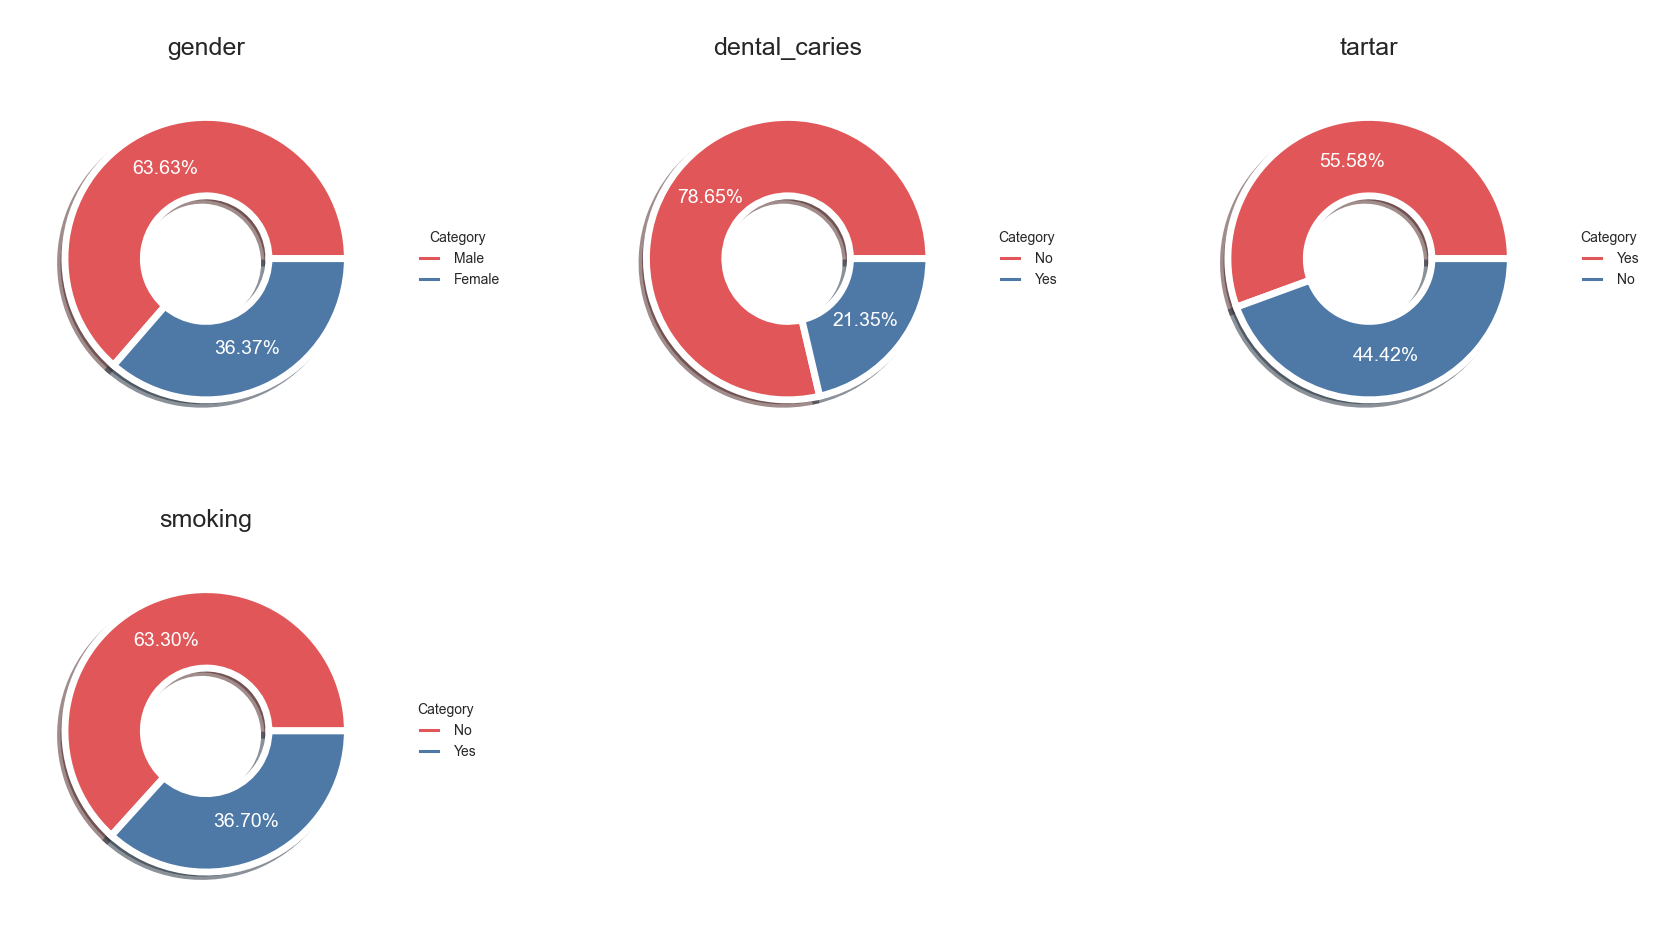

In [79]:
colors_palette = ["#e15759", "#4e79a7"]

cat_columns = df.select_dtypes(include="object").columns.tolist()

n_vars = len(cat_columns)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axs = axs.flatten()
plt.tight_layout(pad=4.0)

for i, column in enumerate(cat_columns):
    ax = axs[i]

    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values

    # Repetir colores si hay más de 2 categorías
    colors = (colors_palette * (len(values) // len(colors_palette) + 1))[:len(values)]

    wedges, texts, autotexts = ax.pie(
        values,
        autopct="%.2f%%",
        pctdistance=0.7,
        startangle=0,
        radius=0.9,
        colors=colors,
        shadow=True,
        textprops=dict(size=14, color="white"),
        wedgeprops=dict(
            width=0.5,
            edgecolor="white",
            linewidth=5
        )
    )

    ax.set_title(f"\n{column}", fontsize=18)
    ax.legend(
        wedges,
        labels,
        title="Category",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

# Eliminar subplots vacíos
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.show()


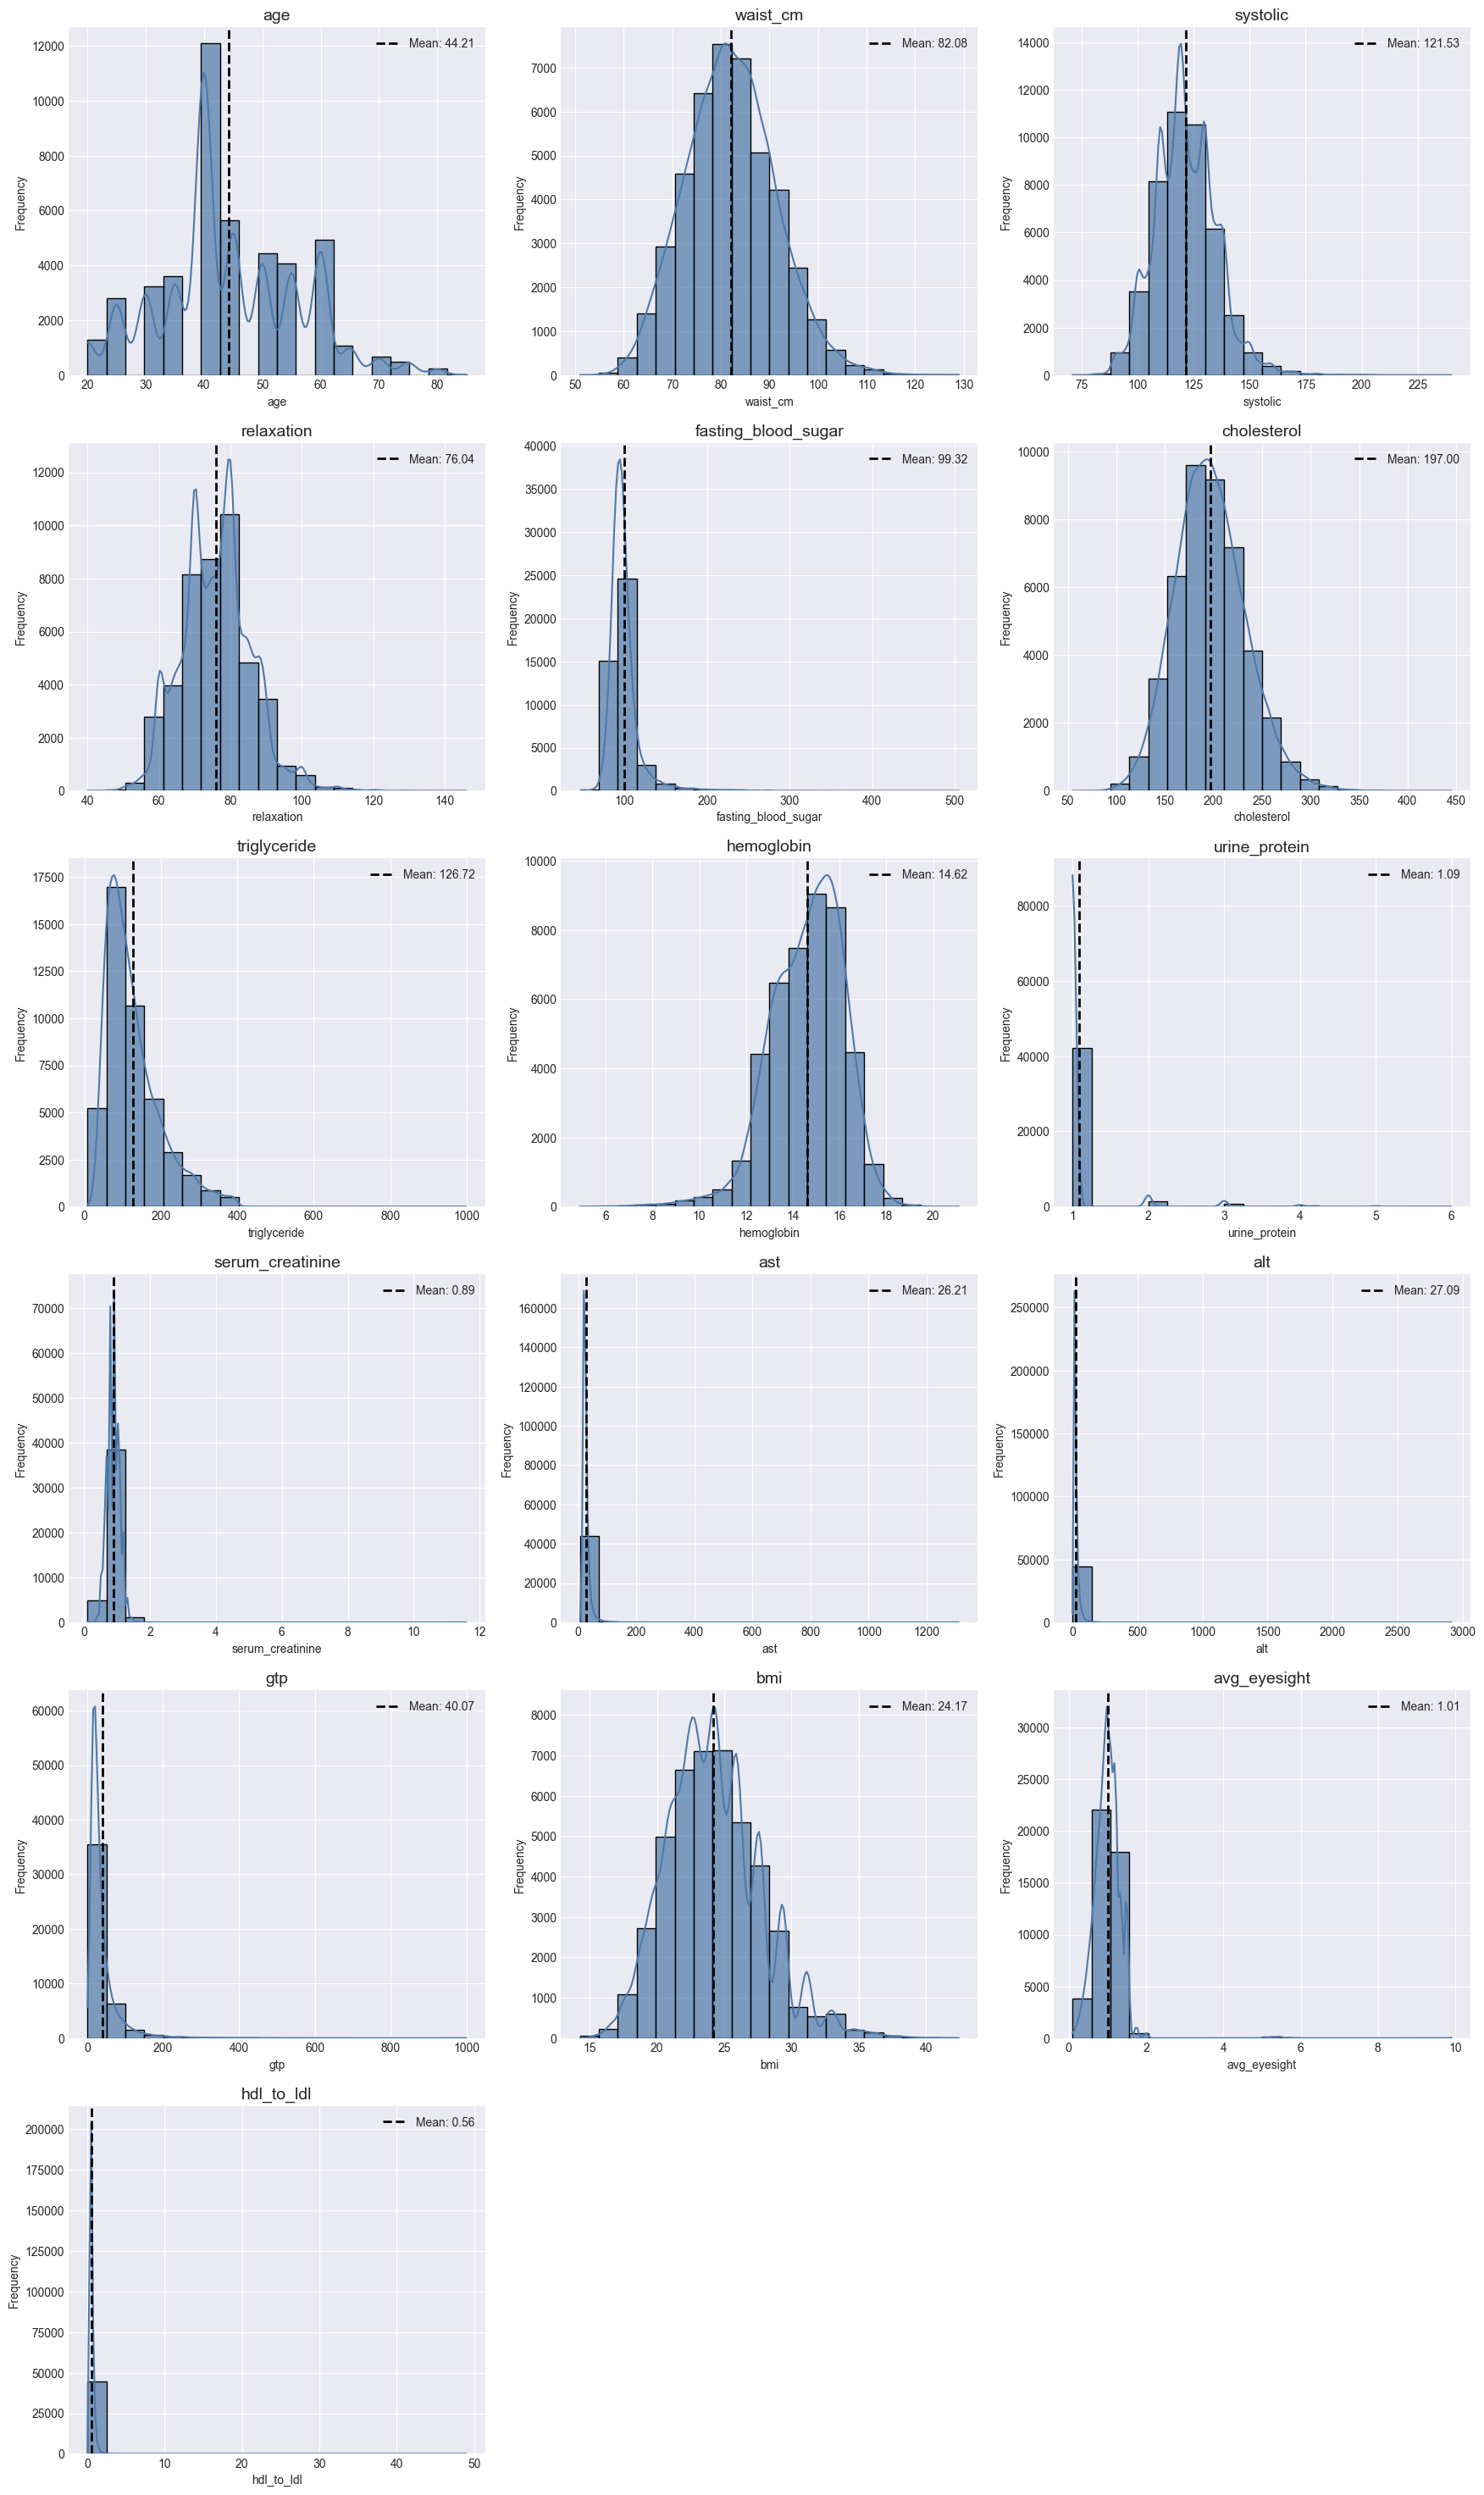

In [80]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_vars = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axs = axs.flatten()
plt.tight_layout(pad=4.0)

for i, column in enumerate(numeric_cols):
    ax = axs[i]

    data = df[column].dropna()
    mean_val = data.mean()

    sns.histplot(
        data,
        bins=20,
        kde=True,             
        color='#4e79a7',
        alpha=0.7,
        ax=ax
    )

    ax.axvline(
        mean_val,
        color='black',
        linestyle='--',
        linewidth=2,
        label=f"Mean: {mean_val:.2f}"
    )

    ax.set_title(column, fontsize=14)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.show()


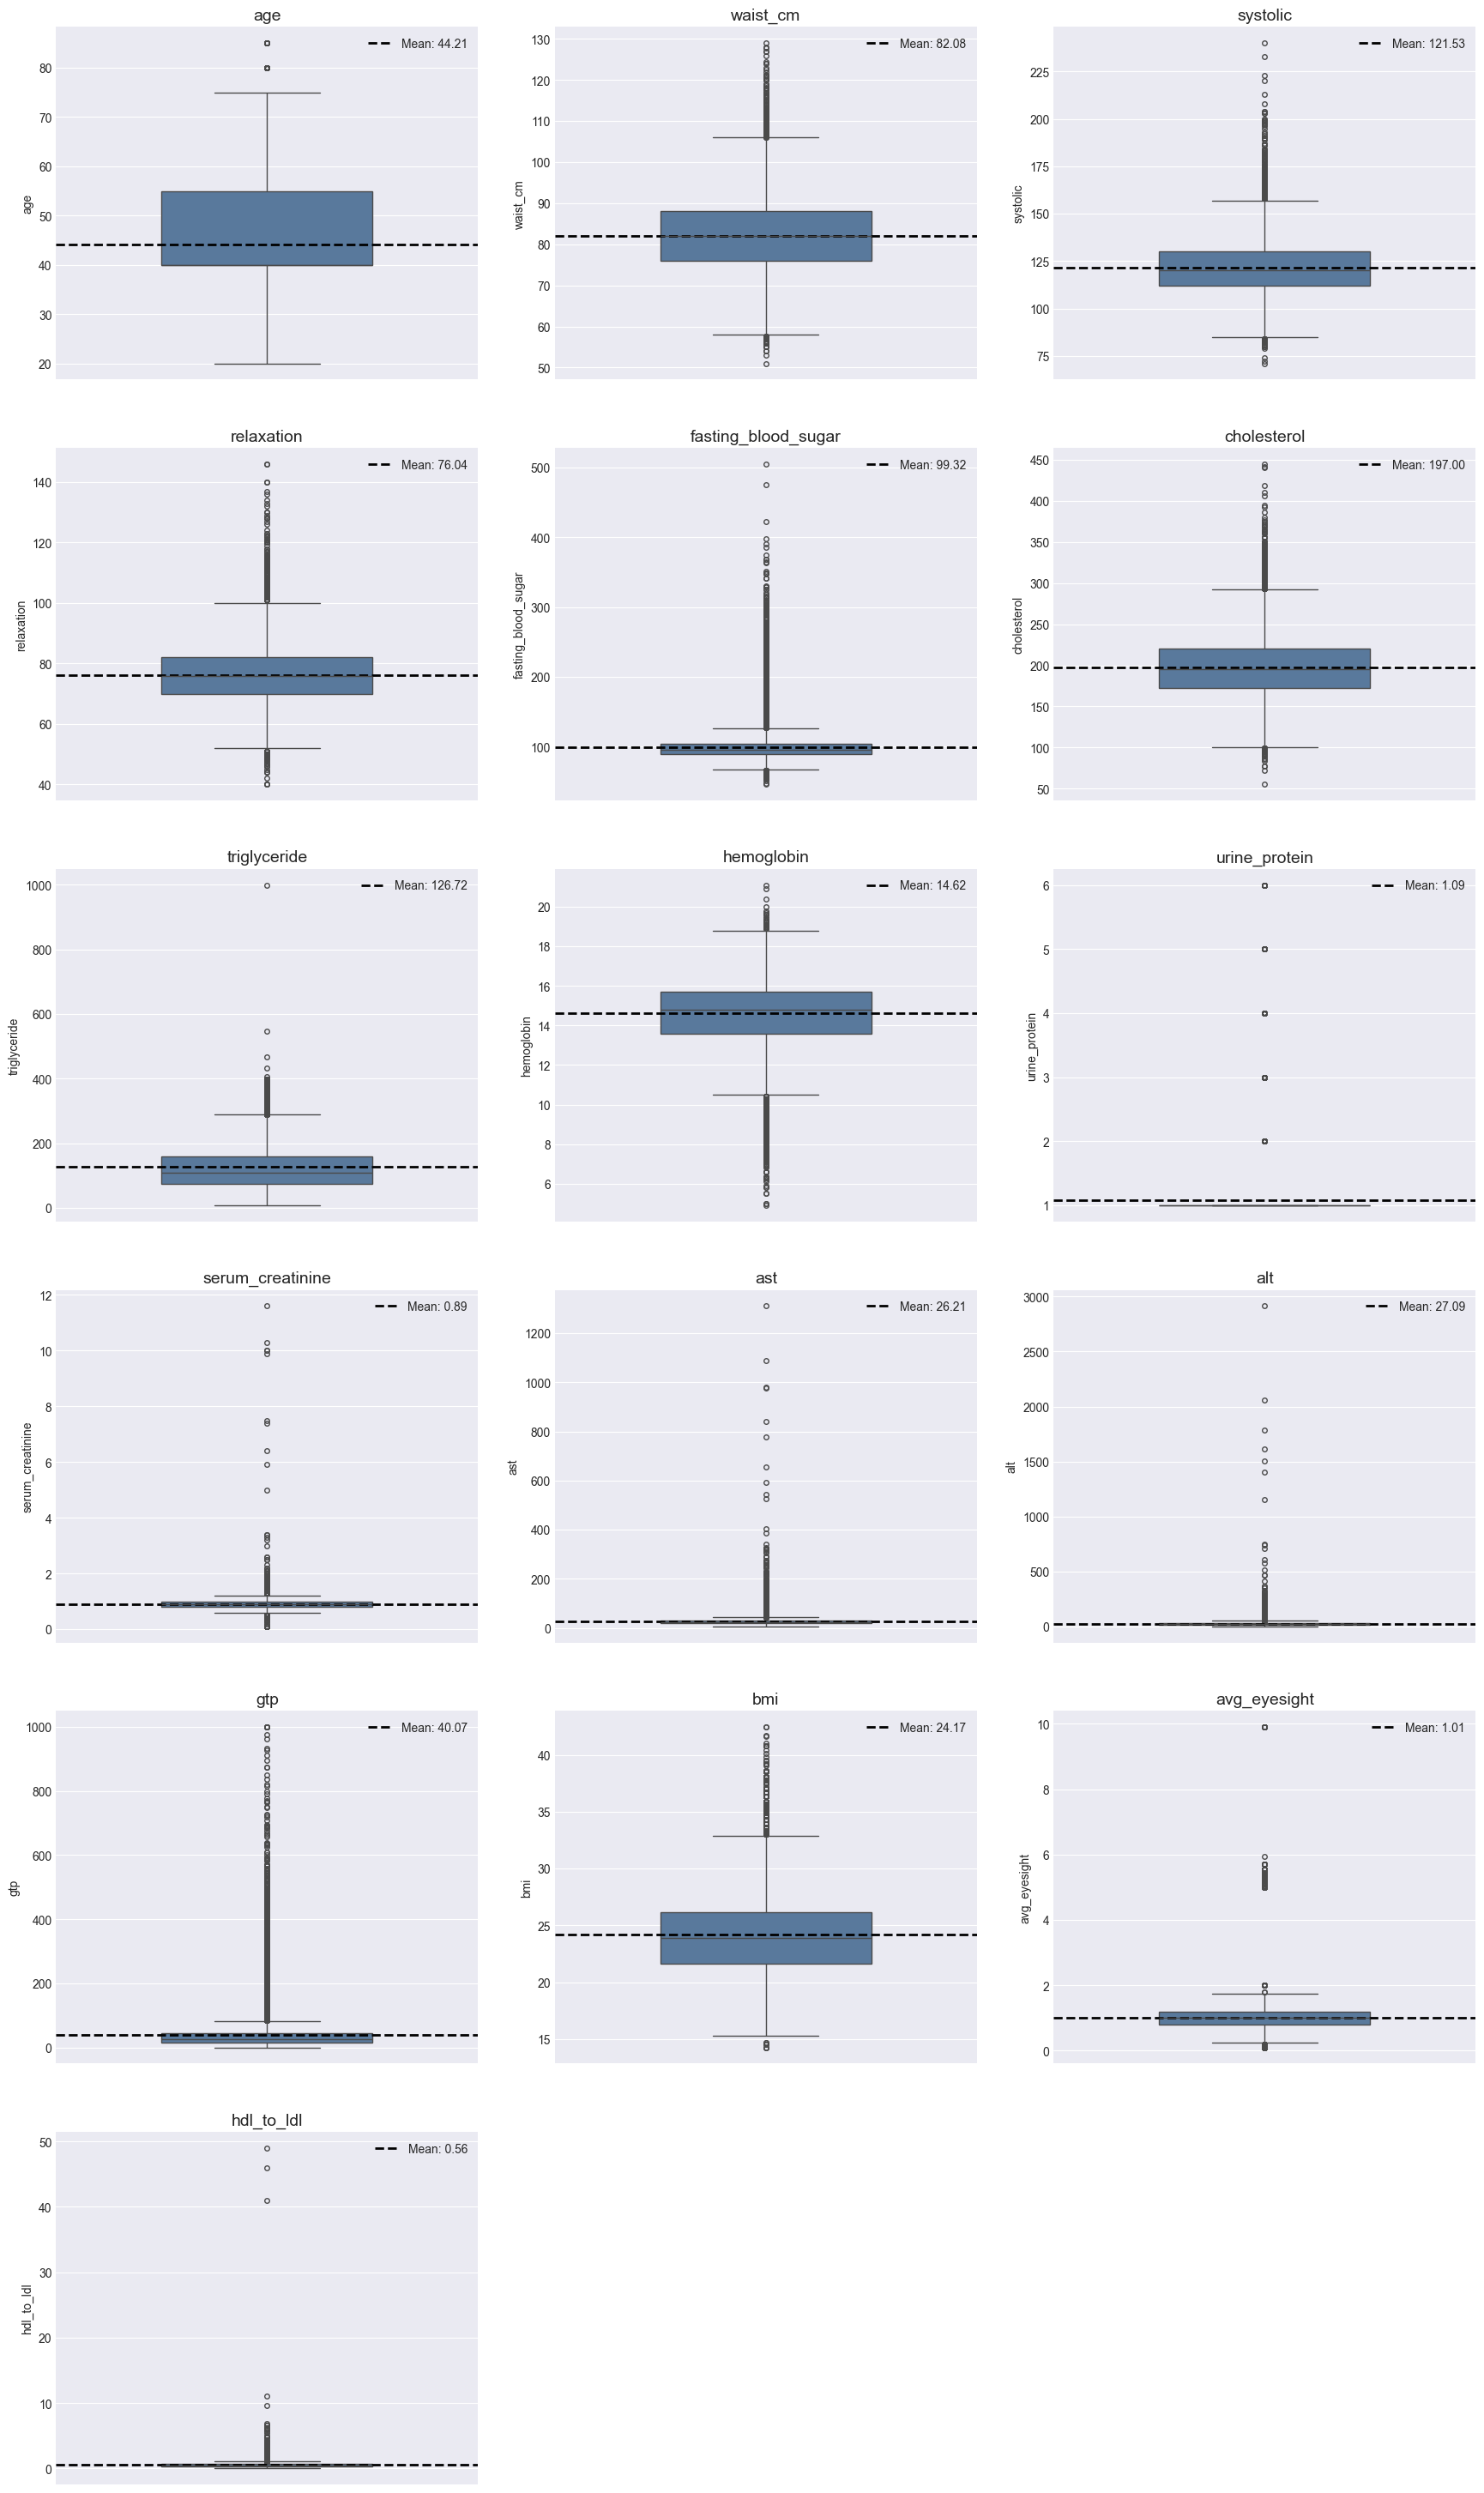

In [81]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_vars = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axs = axs.flatten()
plt.tight_layout(pad=4.0)

for i, column in enumerate(numeric_cols):
    ax = axs[i]

    data = df[column].dropna()
    mean_val = data.mean()

    sns.boxplot(
        y=data,
        ax=ax,
        color='#4e79a7',
        width=0.5,
        fliersize=4
    )


    ax.axhline(
        mean_val,
        color='black',
        linestyle='--',
        linewidth=2,
        label=f"Mean: {mean_val:.2f}"
    )

    ax.set_title(column, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel(column)
    ax.legend()

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.show()



In [82]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df_no_outliers = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) &
        (df_no_outliers[col] <= upper_bound)
    ]

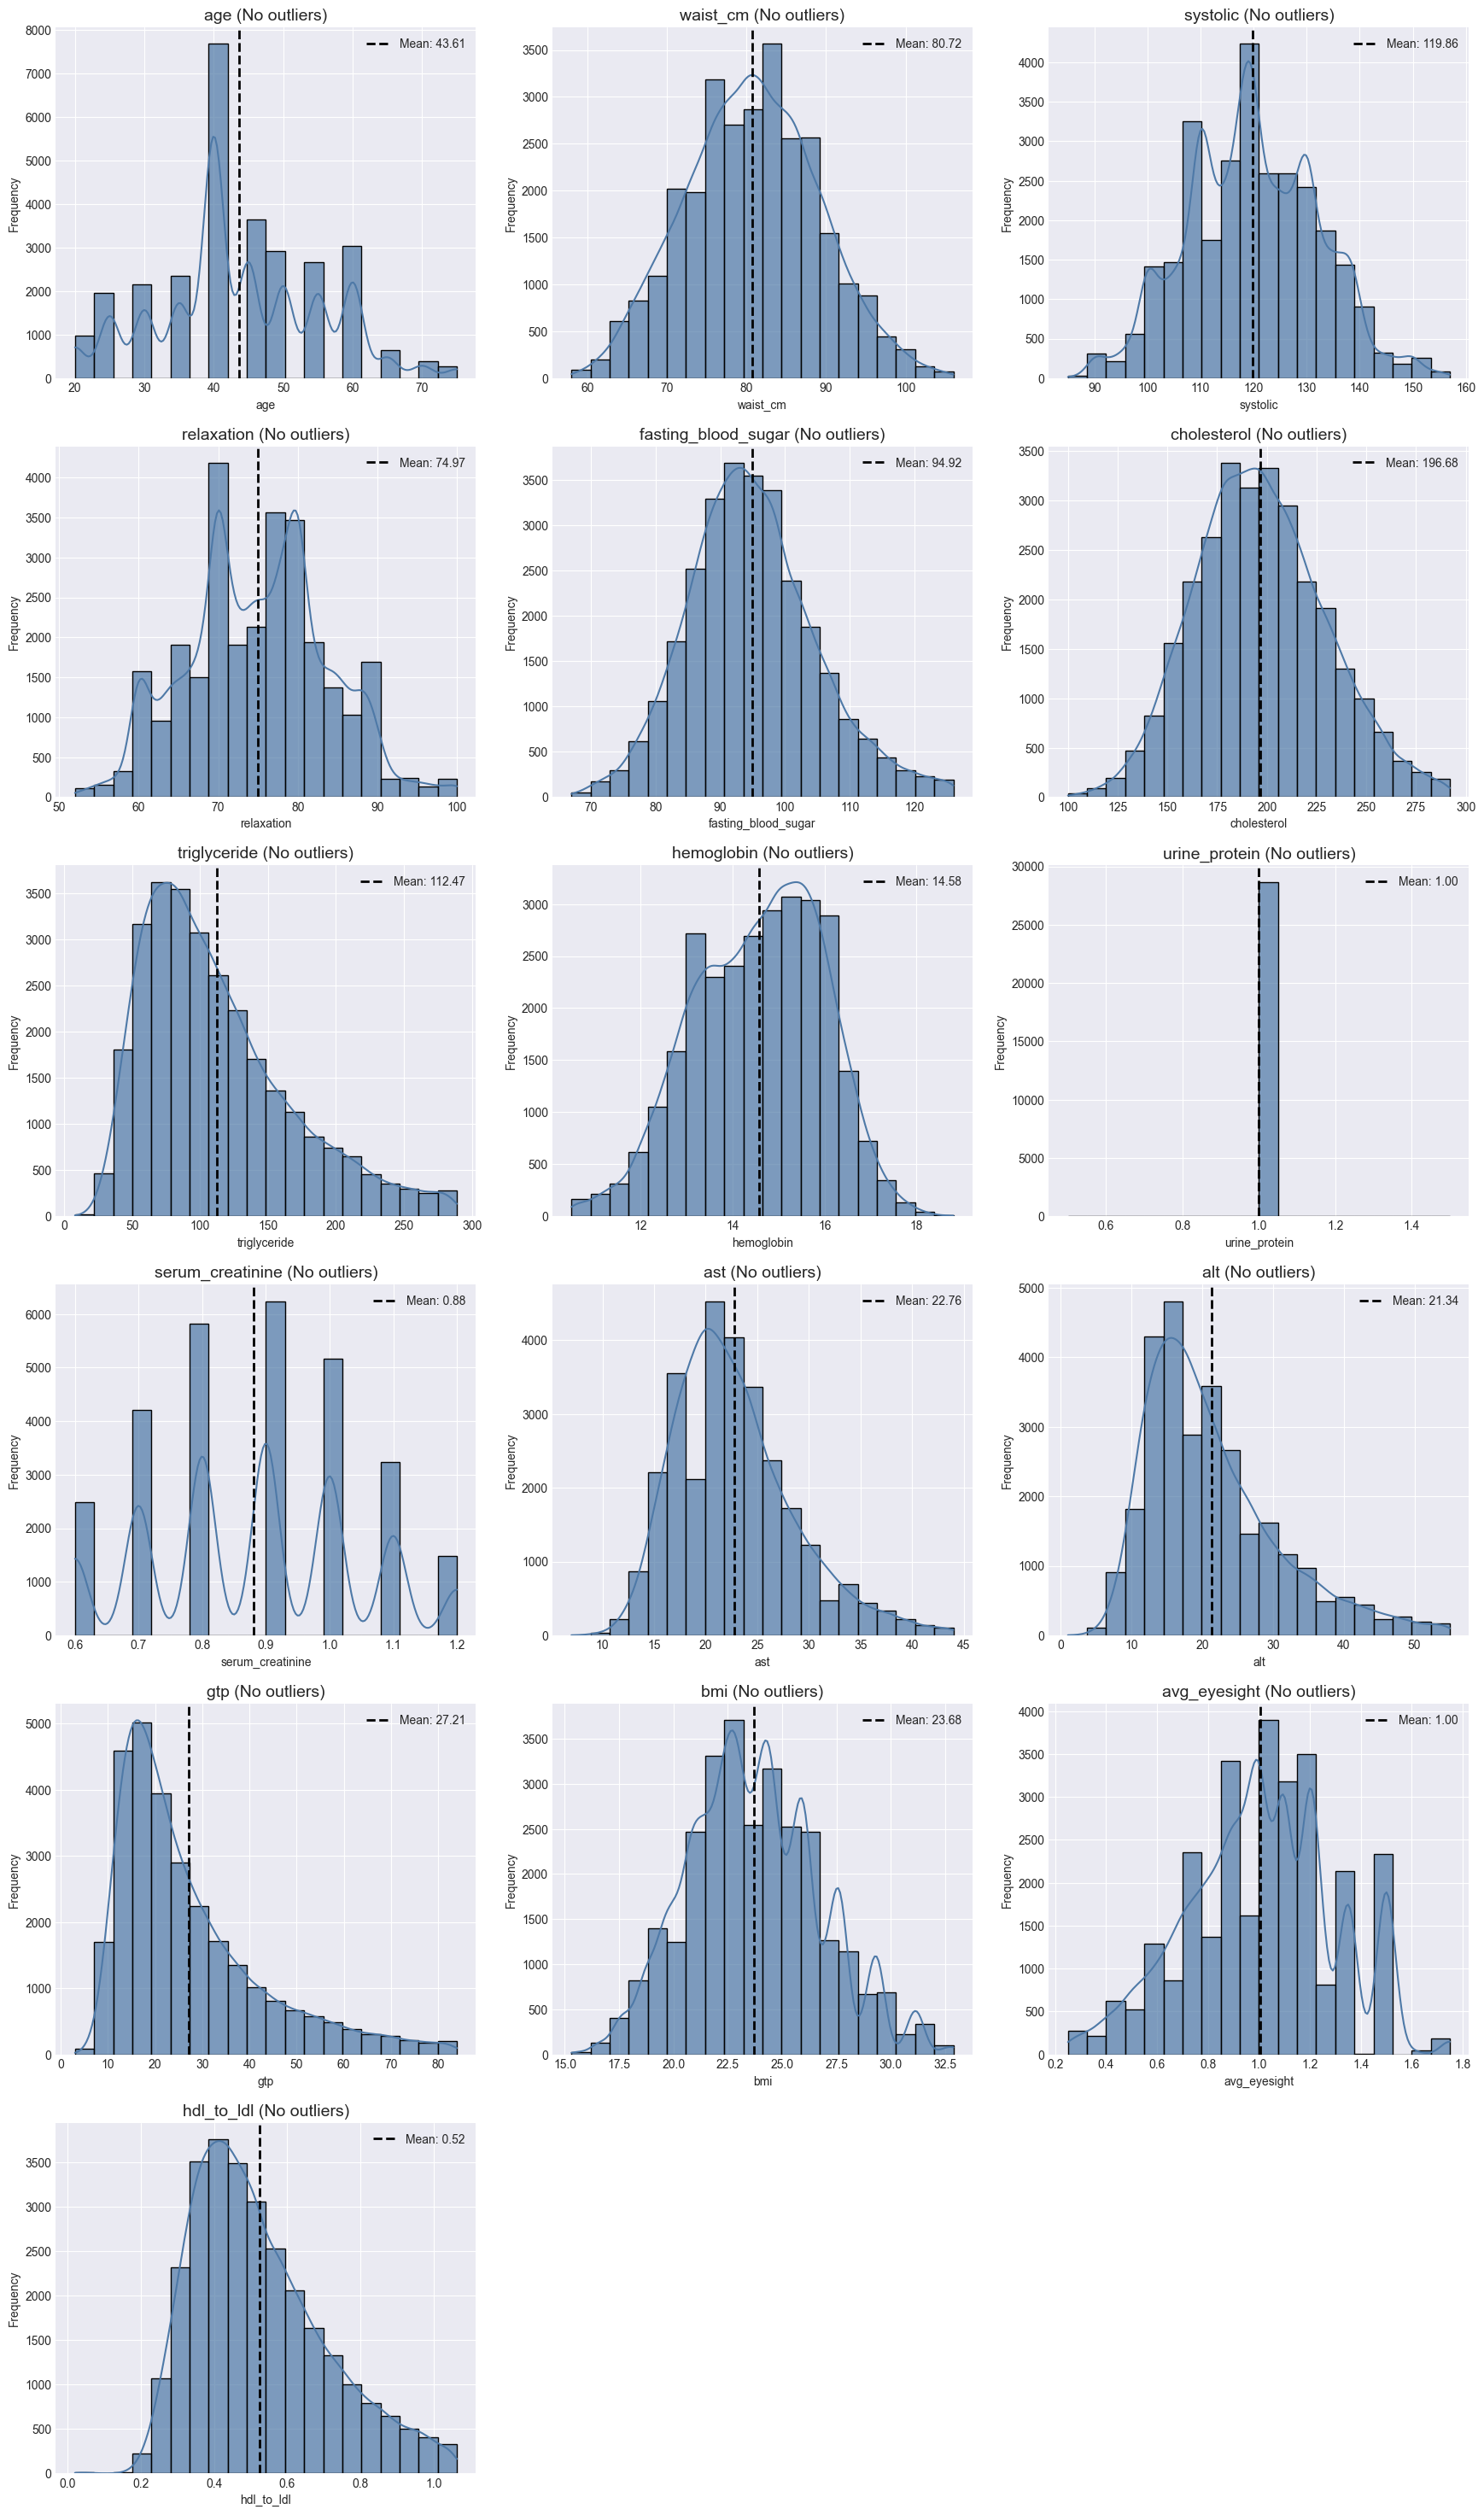

In [83]:
numeric_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_vars = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axs = axs.flatten()
plt.tight_layout(pad=4.0)

for i, column in enumerate(numeric_cols):
    ax = axs[i]

    data = df_no_outliers[column].dropna()
    mean_val = data.mean()

    sns.histplot(
        data,
        bins=20,
        kde=True,
        color='#4e79a7',
        alpha=0.7,
        ax=ax
    )

    ax.axvline(
        mean_val,
        color='black',
        linestyle='--',
        linewidth=2,
        label=f"Mean: {mean_val:.2f}"
    )

    ax.set_title(f"{column} (No outliers)", fontsize=14)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()


for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.show()

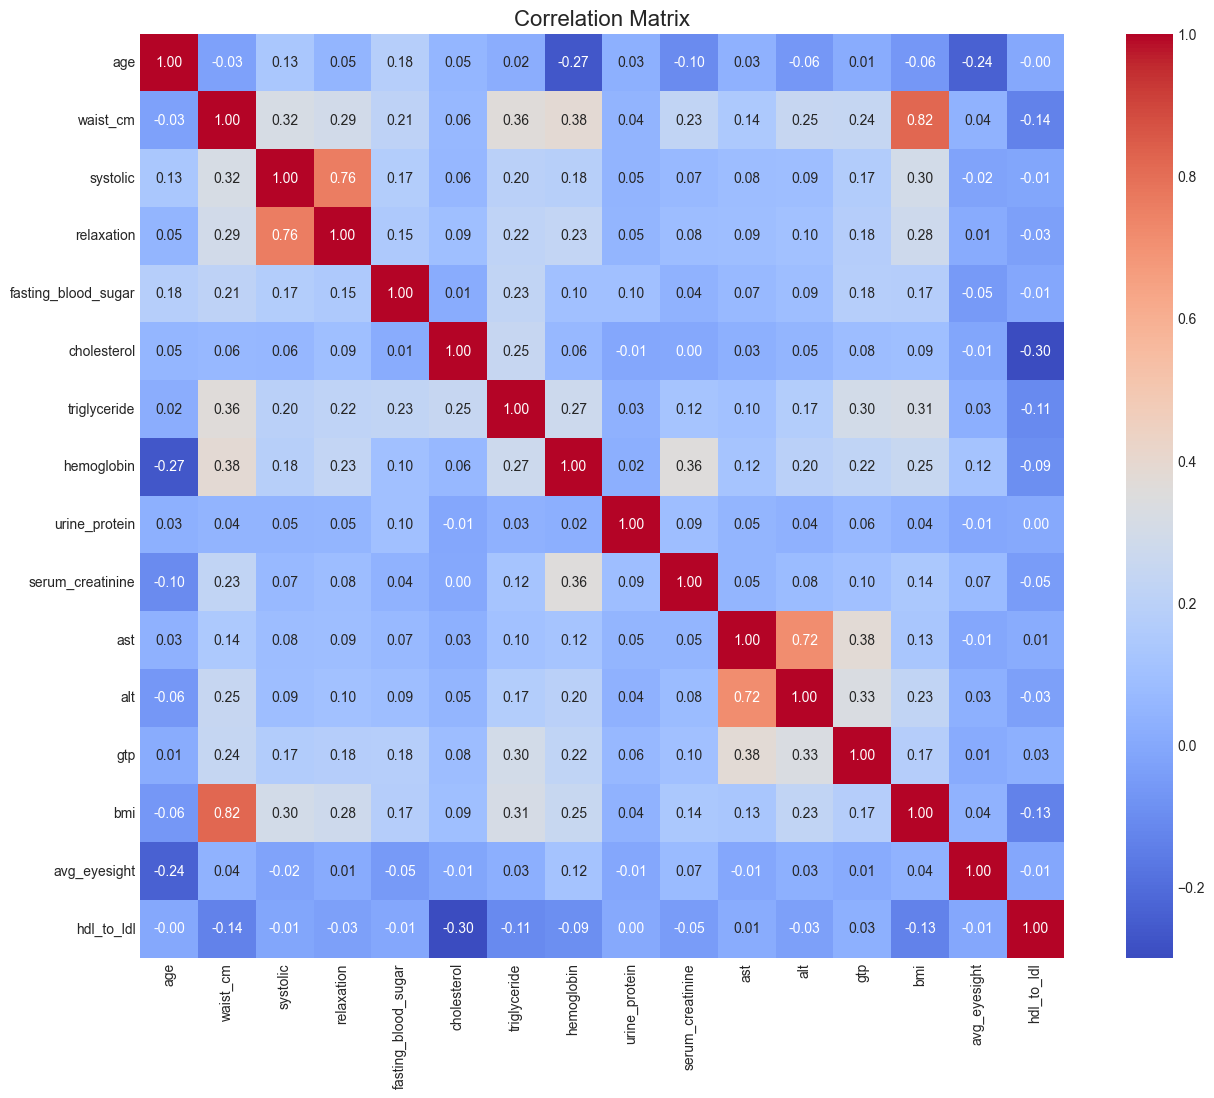

In [84]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [85]:
smoking_0 = df[df["smoking"] == "No"]
smoking_1 = df[df["smoking"] == "Yes"]


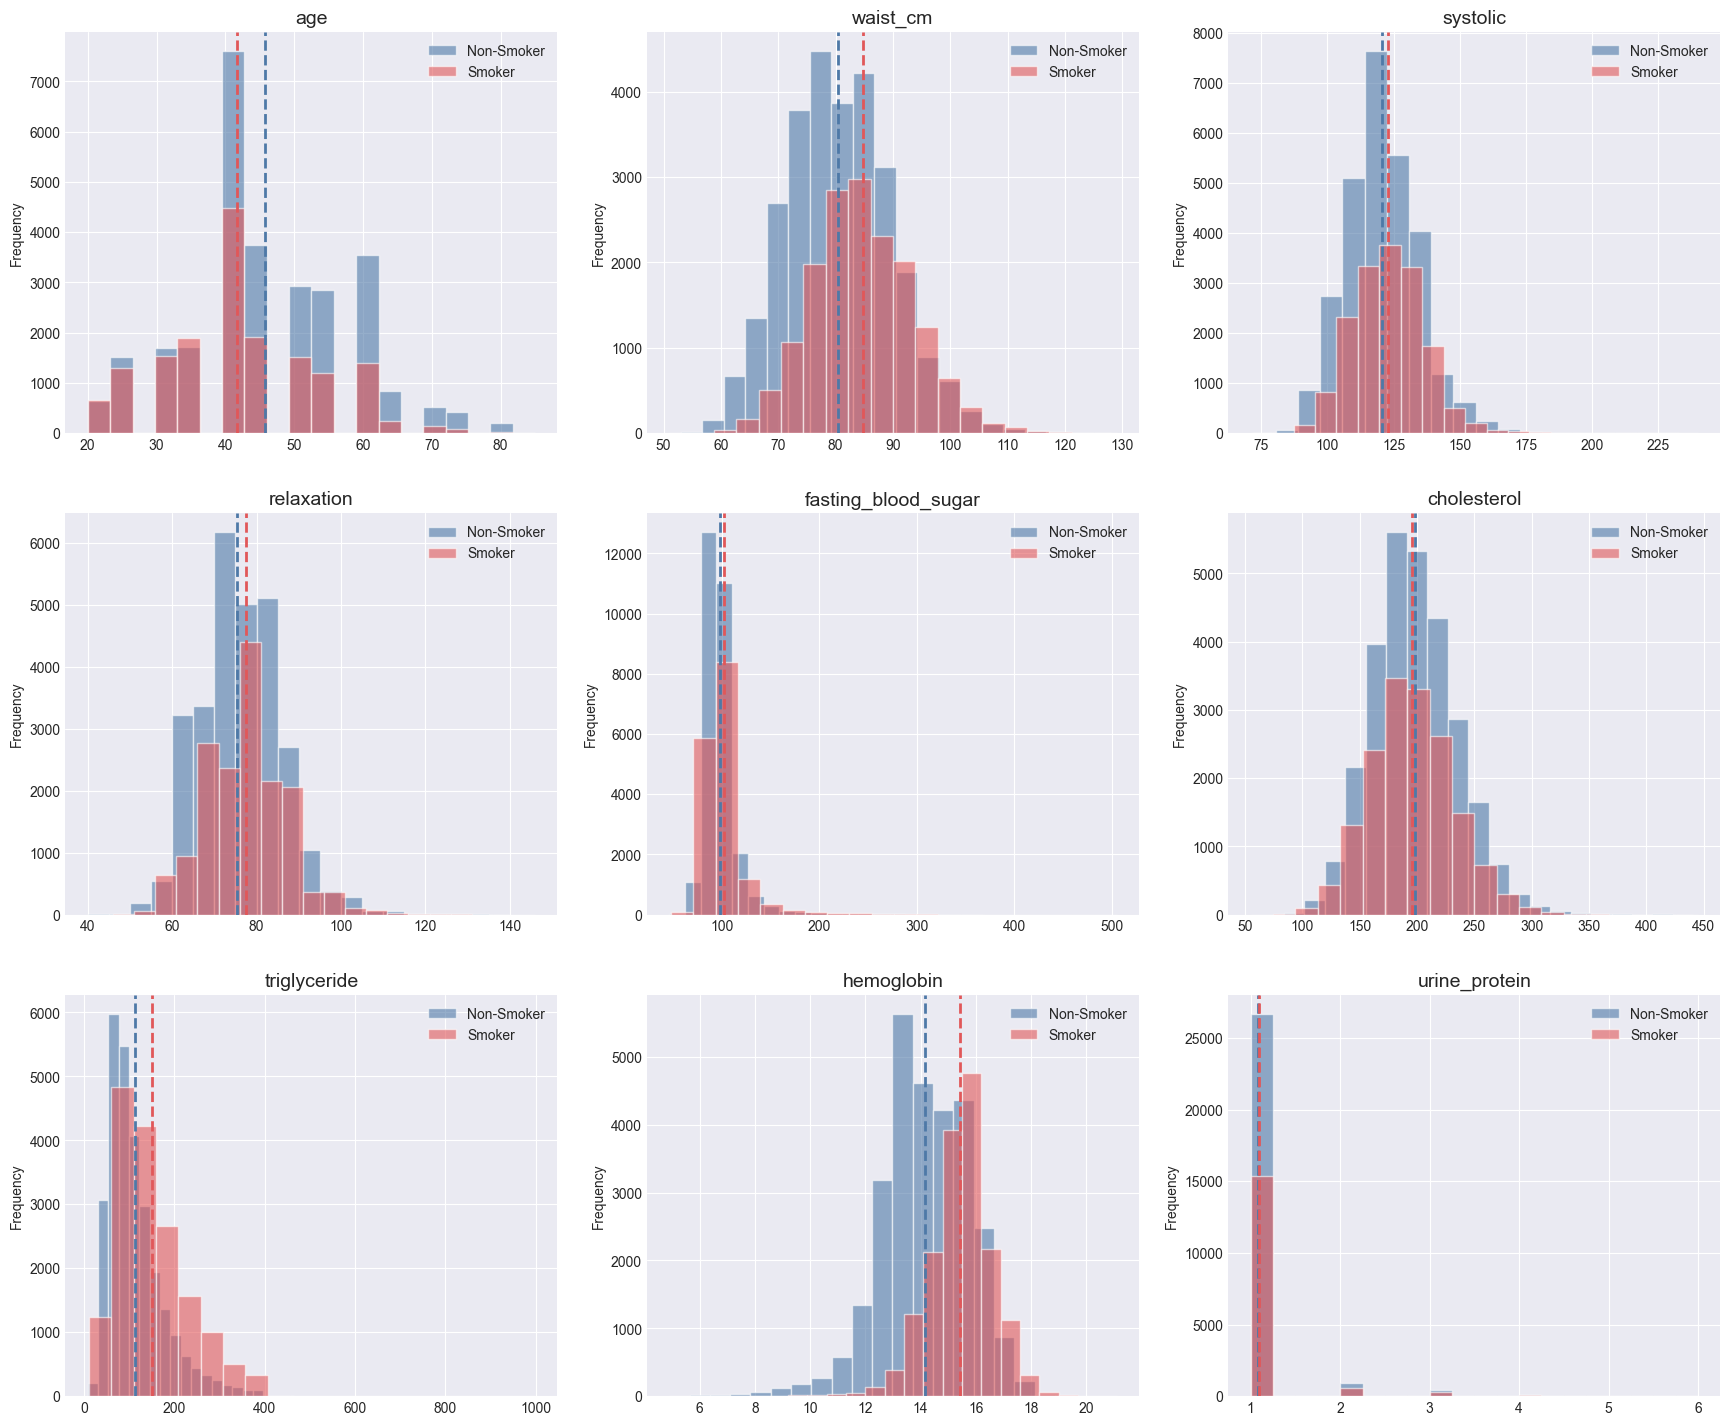

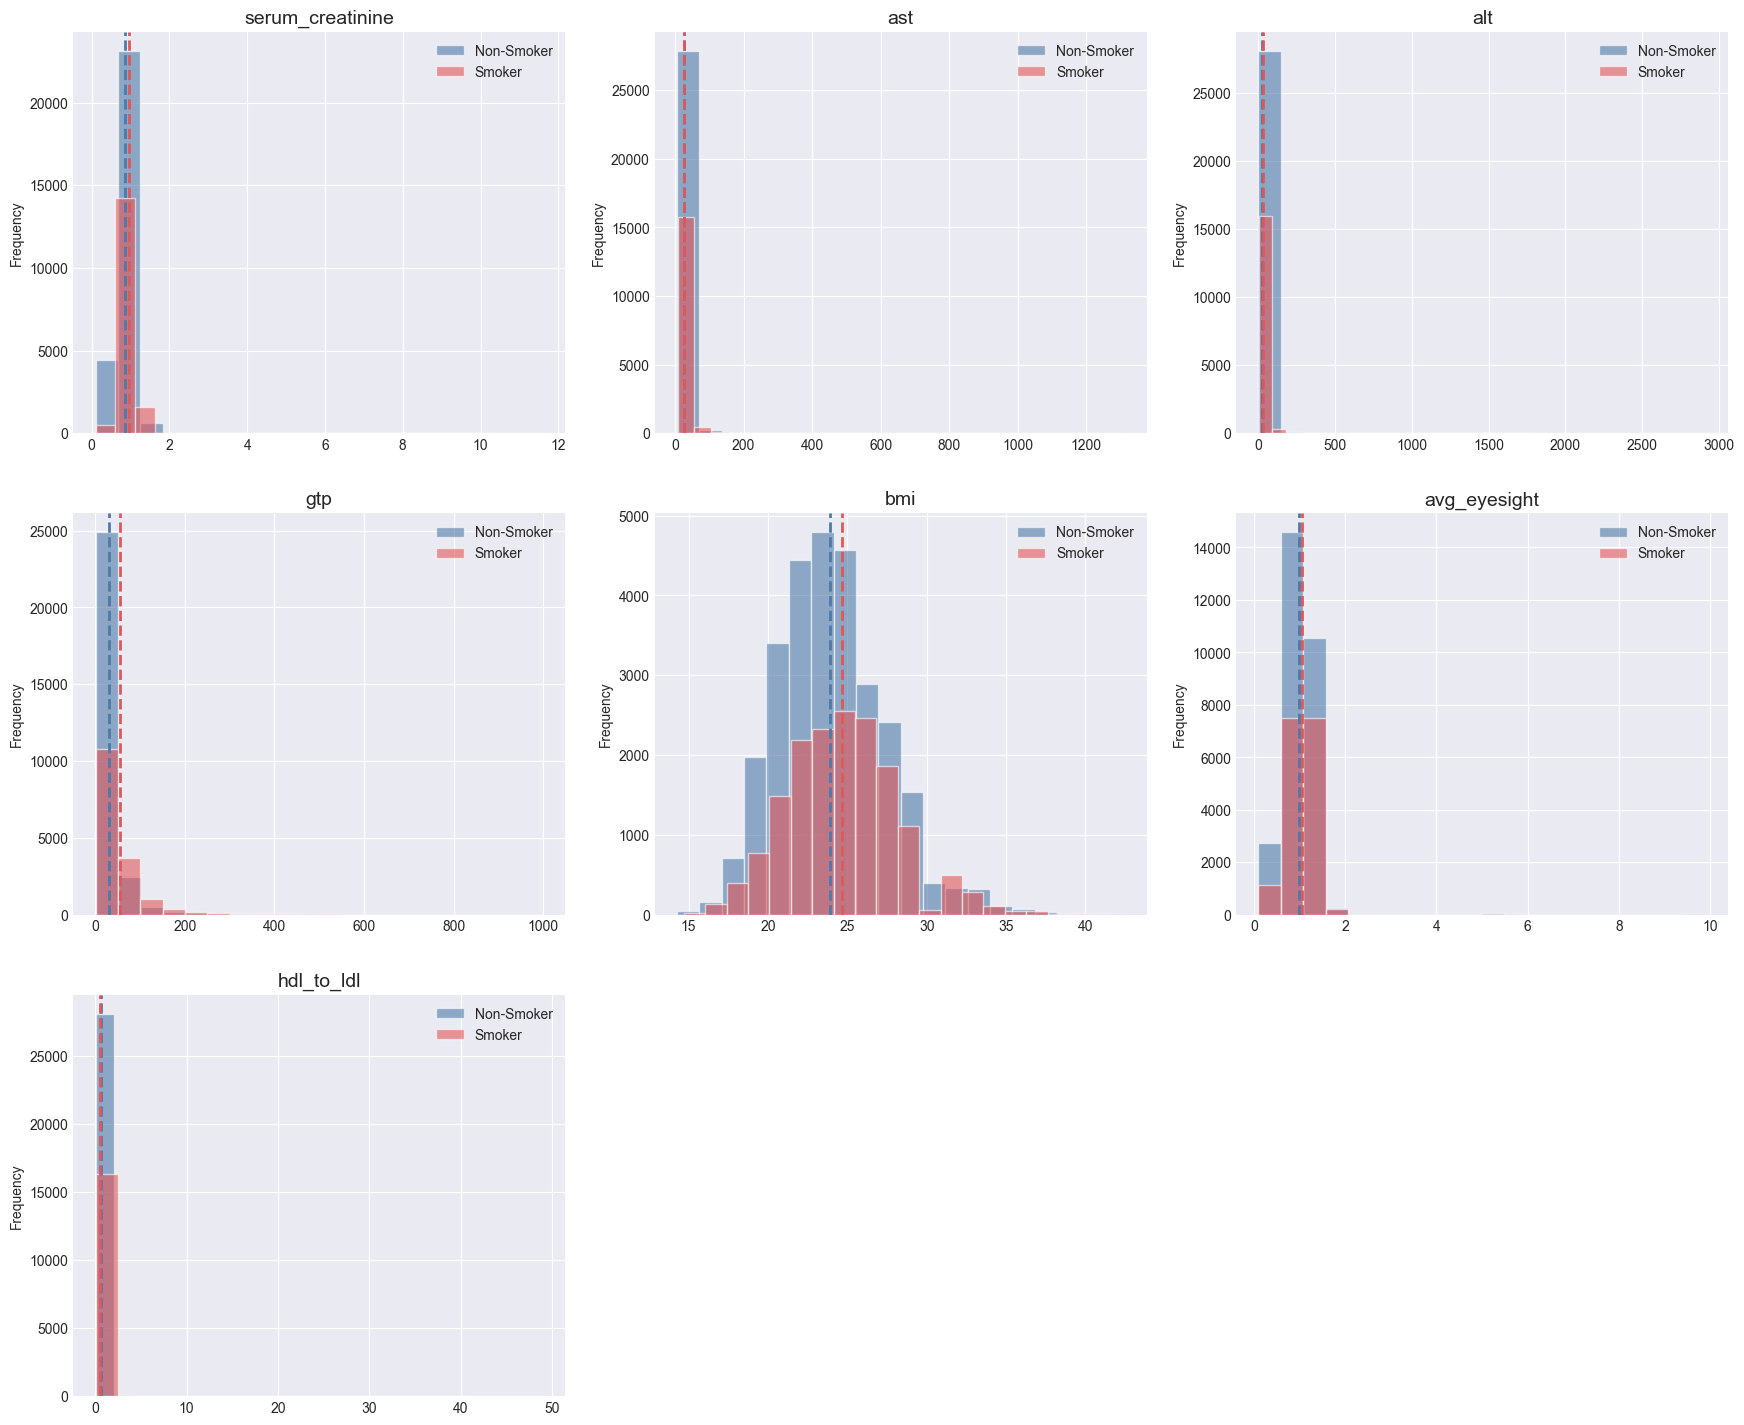

In [86]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

half = (len(numeric_cols) // 2) + 1
first_half = numeric_cols[:half]
second_half = numeric_cols[half:]


def plot_comparison_histogram_style(columns, group0, group1):
    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten()
    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        ax = axs[i]

        data_0 = group0[col].dropna()
        data_1 = group1[col].dropna()

        mean_0 = data_0.mean()
        mean_1 = data_1.mean()


        ax.hist(
            data_0, bins=20, alpha=0.6,
            color="#4e79a7", edgecolor="white",
            label="Non-Smoker"
        )

        ax.hist(
            data_1, bins=20, alpha=0.6,
            color="#e15759", edgecolor="white",
            label="Smoker"
        )


        ax.axvline(mean_0, color="#4e79a7", linestyle="--", linewidth=2)
        ax.axvline(mean_1, color="#e15759", linestyle="--", linewidth=2)

        ax.set_title(col, fontsize=14)
        ax.set_ylabel("Frequency")
        ax.legend()

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


plot_comparison_histogram_style(first_half, smoking_0, smoking_1)
plot_comparison_histogram_style(second_half, smoking_0, smoking_1)


In [87]:
def remove_outliers_iqr(df, numeric_cols):
    df_clean = df.copy()

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) &
            (df_clean[col] <= upper)
        ]

    return df_clean


In [88]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

smoking_0_no_out = remove_outliers_iqr(smoking_0, numeric_cols)
smoking_1_no_out = remove_outliers_iqr(smoking_1, numeric_cols)

print("Original shapes:")
print(smoking_0.shape, smoking_1.shape)

print("\nWithout outliers:")
print(smoking_0_no_out.shape, smoking_1_no_out.shape)


Original shapes:
(28200, 20) (16352, 20)

Without outliers:
(17632, 20) (9868, 20)


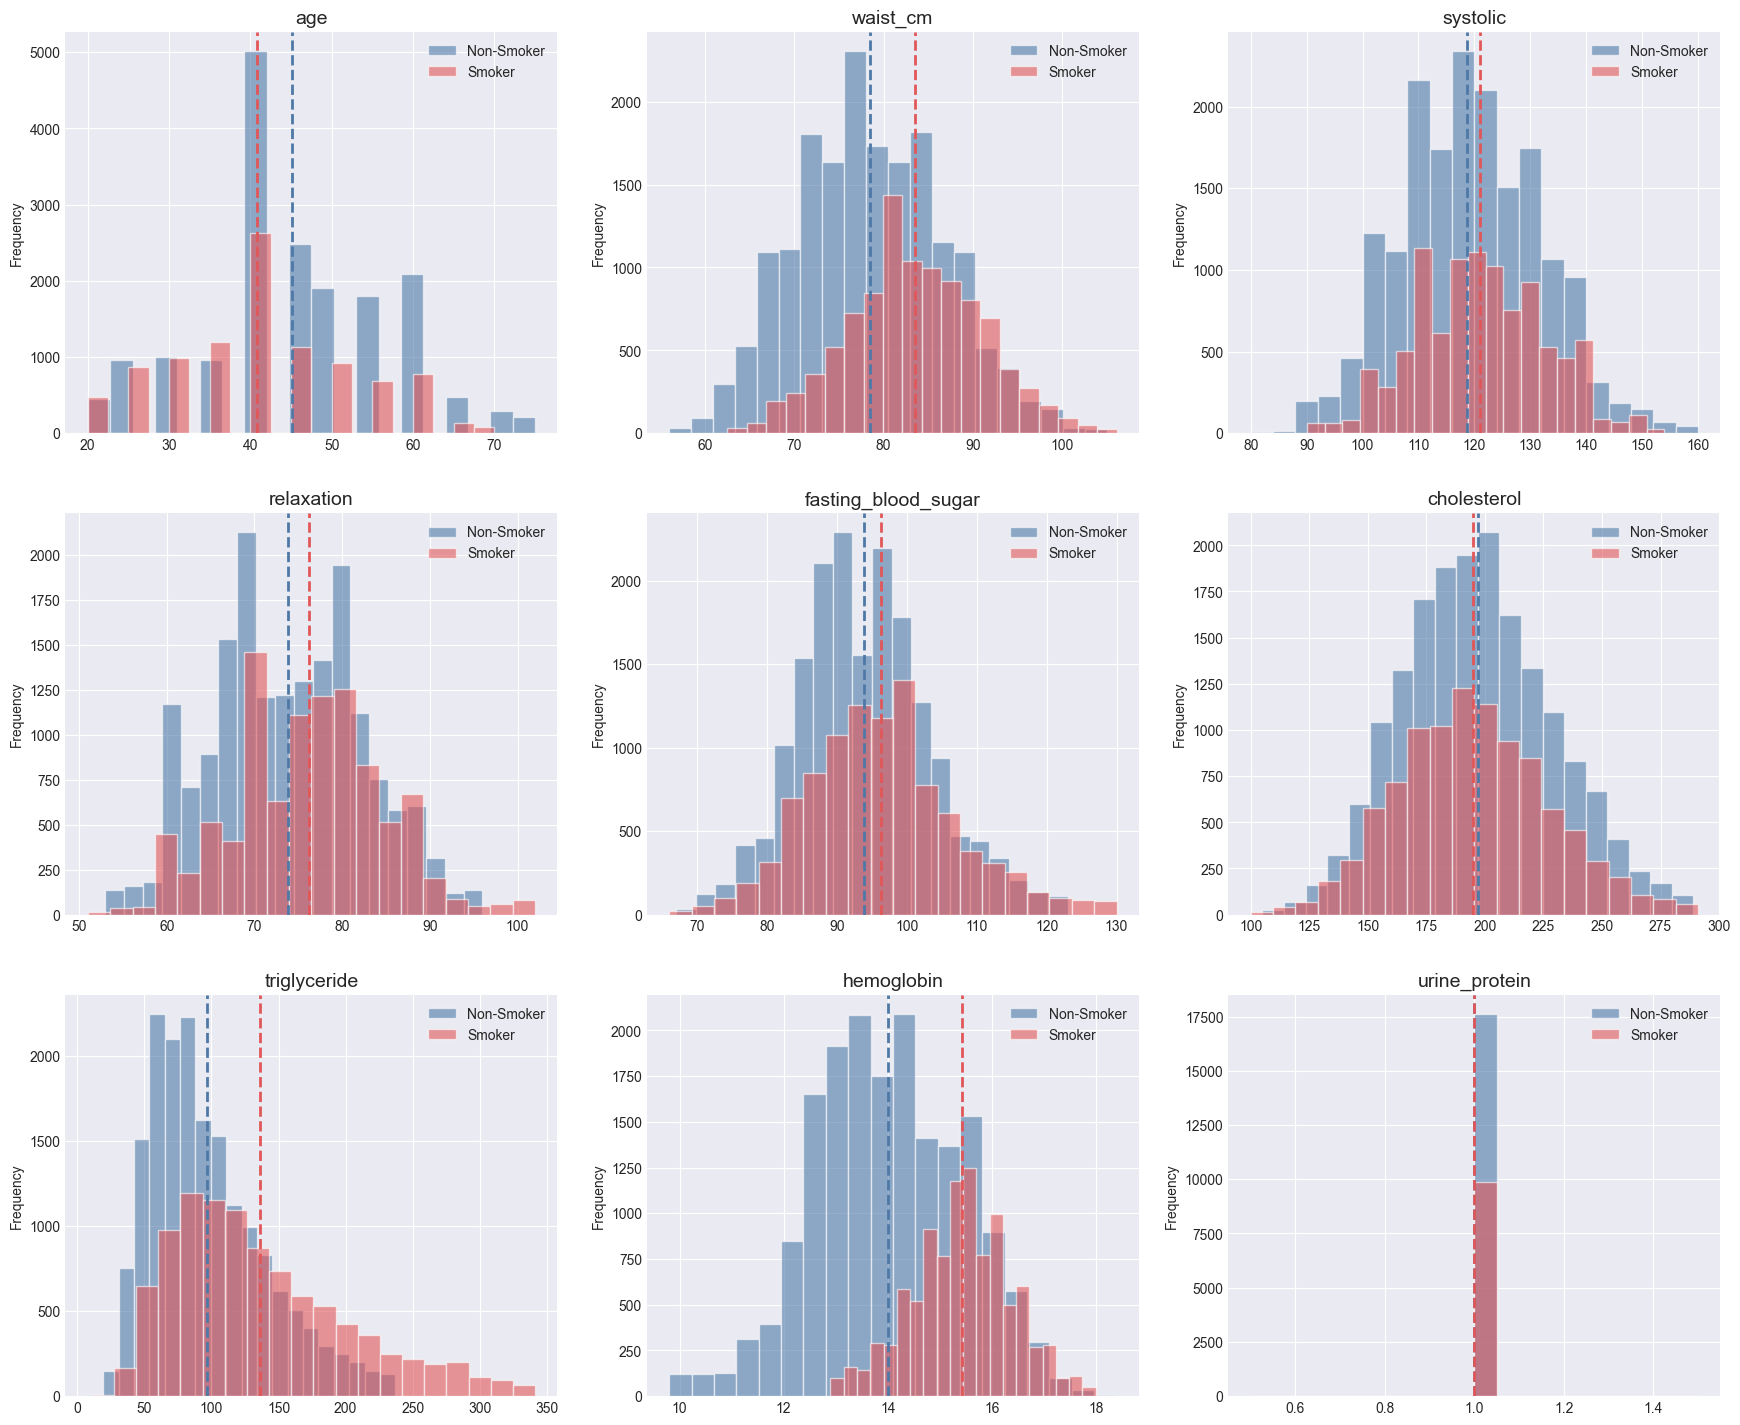

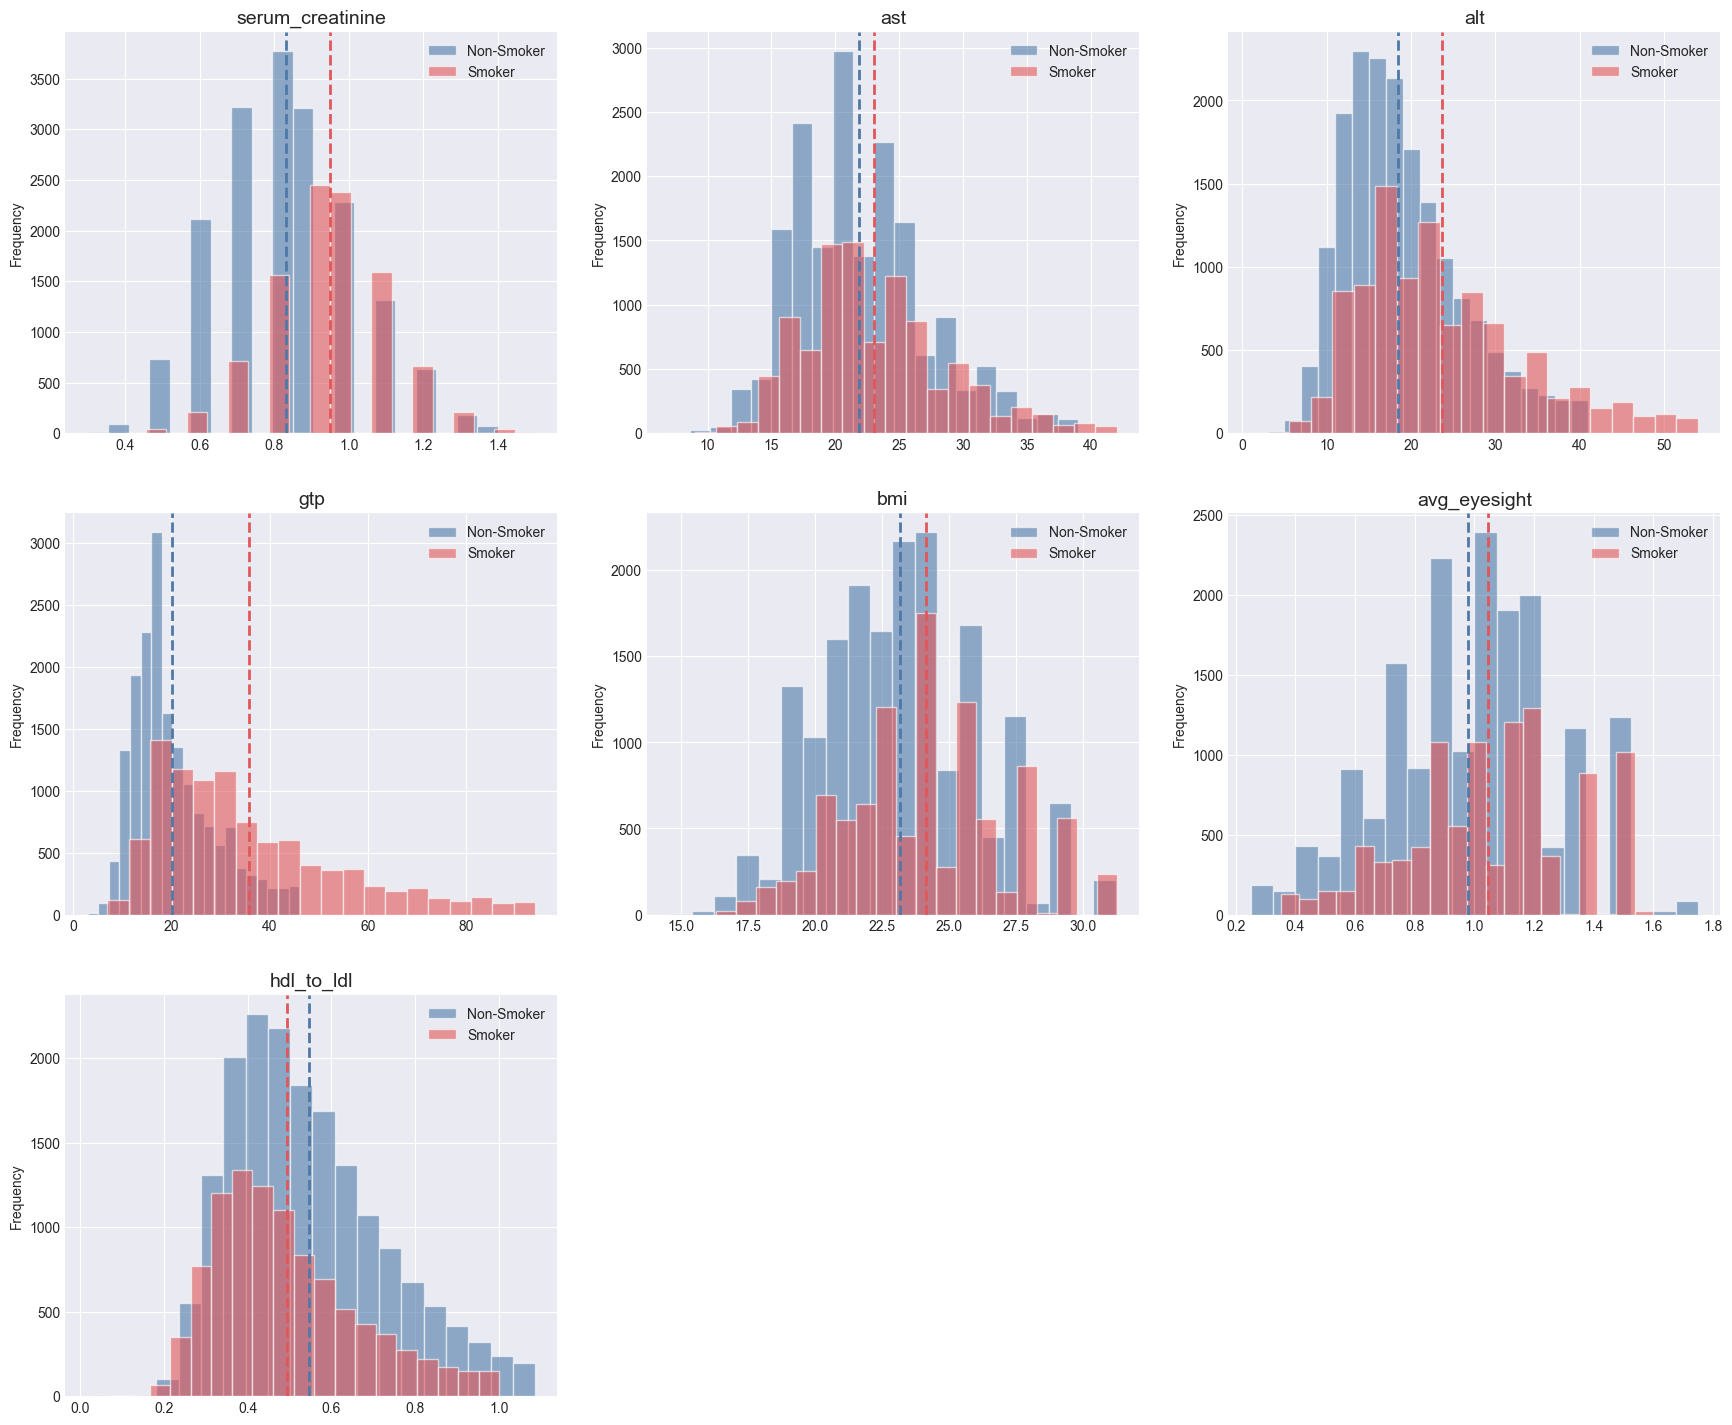

In [89]:
plot_comparison_histogram_style(first_half, smoking_0_no_out, smoking_1_no_out)
plot_comparison_histogram_style(second_half, smoking_0_no_out, smoking_1_no_out)


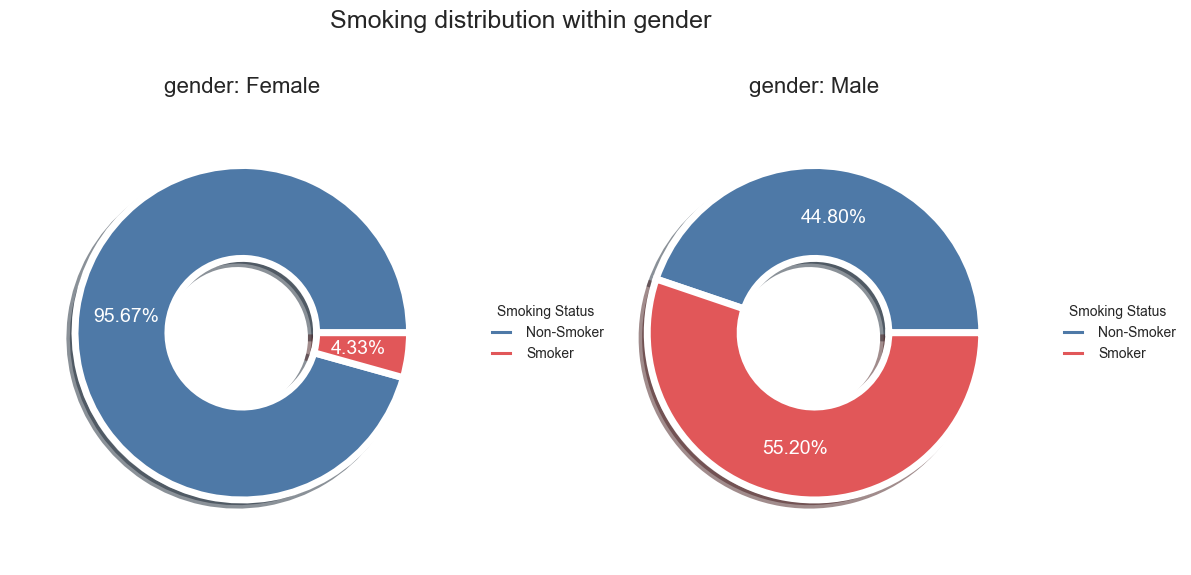

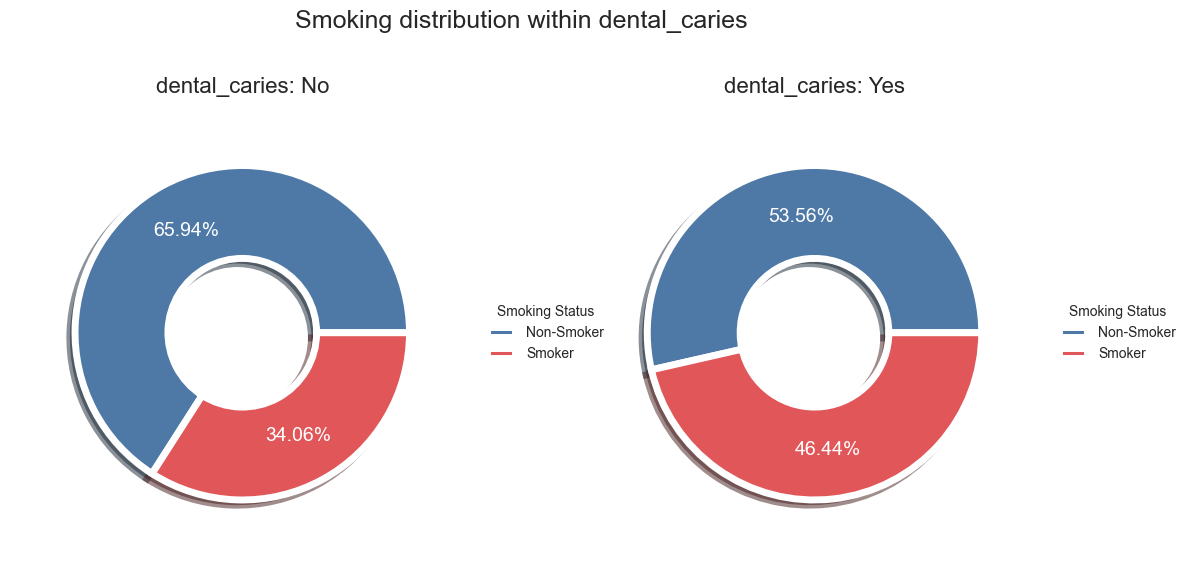

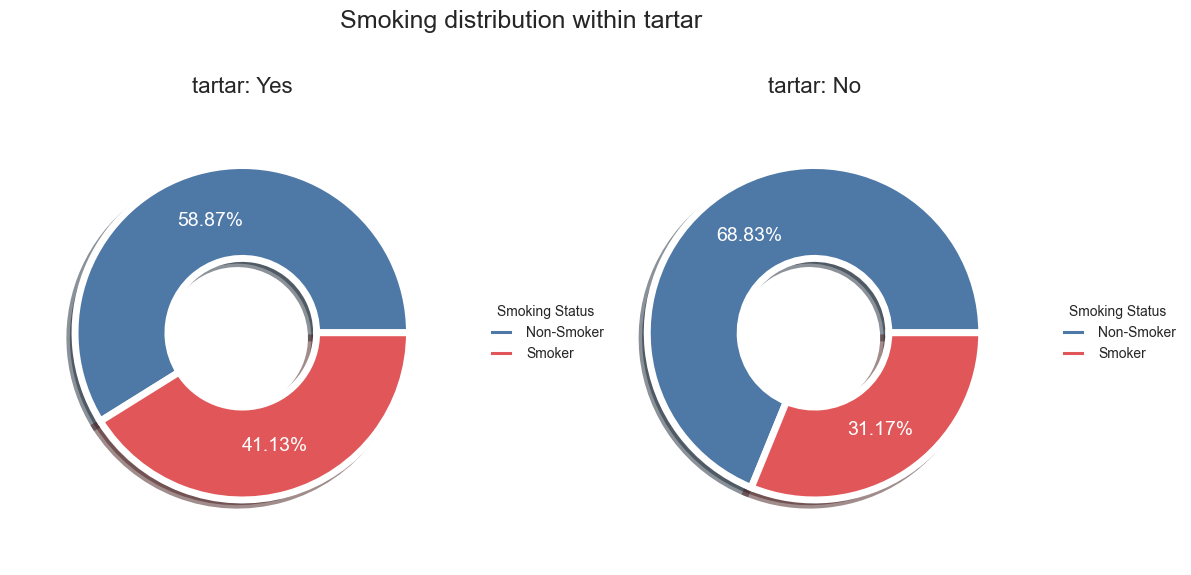

In [90]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in ["smoking"]]

for col in categorical_cols:

    categories = df[col].dropna().unique()
    n_cat = len(categories)

    fig, axs = plt.subplots(1, n_cat, figsize=(6 * n_cat, 6))
    if n_cat == 1:
        axs = [axs]

    plt.tight_layout(pad=4.0)

    for i, category in enumerate(categories):
        ax = axs[i]

        subset = df[df[col] == category]

        counts = subset["smoking"].value_counts().reindex(["No", "Yes"], fill_value=0)

        labels = ["Non-Smoker", "Smoker"]
        colors = ["#4e79a7", "#e15759"]

        ax.pie(
            counts.values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=0,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(color="white", size=14),
            wedgeprops=dict(width=0.5, edgecolor="white", linewidth=5)
        )

        ax.set_title(f"{col}: {category}", fontsize=16)

        ax.legend(
            labels,
            title="Smoking Status",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    plt.suptitle(
        f"Smoking distribution within {col}",
        fontsize=18,
        y=1.05
    )

    plt.show()


<a id="1"></a>
<p style="padding:12px; background-color:#ffffff; margin:0; color:#000000; font-family:serif; font-size:200%; text-align:center; border-radius: 15px 50px; overflow:hidden; font-weight:600; border: 2px solid #000000;">
    Preprocessing For Classification
</p>

In [91]:
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

,gender,age,waist_cm,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking,bmi,avg_eyesight,hdl_to_ldl
0,Female,40,81.300000,114.000000,73.000000,94.000000,215.000000,82.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,No,Yes,No,24.973985,1.100000,0.579365
1,Female,40,81.000000,119.000000,70.000000,130.000000,192.000000,115.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,No,Yes,No,23.437500,0.700000,0.330709
2,Male,55,80.000000,138.000000,86.000000,89.000000,242.000000,182.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,No,No,Yes,20.761246,0.800000,0.364238
3,Male,40,88.000000,100.000000,60.000000,96.000000,322.000000,254.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,No,Yes,No,25.711662,1.500000,0.199115
4,Female,40,86.000000,120.000000,74.000000,80.000000,184.000000,74.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,No,No,No,24.973985,1.000000,0.579439


In [92]:
df_for_model = df.copy()

In [93]:
df_ohe = pd.get_dummies(
    df_for_model,
    columns=["gender"],
    drop_first=True   
)

df_ohe["dental_caries"] = df_ohe["dental_caries"].map({"Yes" : 1 , "No" : 0})
df_ohe["tartar"] = df_ohe["tartar"].map({"Yes" : 1 , "No" : 0})
df_ohe["smoking"] = df_ohe["smoking"].map({"Yes" : 1 , "No" : 0})

df_for_train = df_ohe.drop(["urine_protein"], axis = 1)

X = df_for_train.drop("smoking", axis = 1)
y = df_for_train["smoking"]

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Tamaño de los conjuntos:")
print(f"Train: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test:  {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribución de clases en TRAIN:")
train_counts = y_train.value_counts().sort_index()
print(f"No fumador (0): {train_counts[0]:,} ({train_counts[0]/len(y_train)*100:.2f}%)")
print(f"Fumador (1):    {train_counts[1]:,} ({train_counts[1]/len(y_train)*100:.2f}%)")

print("\nDistribución de clases en TEST:")
test_counts = y_test.value_counts().sort_index()
print(f"No fumador (0): {test_counts[0]:,} ({test_counts[0]/len(y_test)*100:.2f}%)")
print(f"Fumador (1):    {test_counts[1]:,} ({test_counts[1]/len(y_test)*100:.2f}%)")


Tamaño de los conjuntos:
Train: 35,641 muestras (80.0%)
Test:  8,911 muestras (20.0%)

Distribución de clases en TRAIN:
No fumador (0): 22,560 (63.30%)
Fumador (1):    13,081 (36.70%)

Distribución de clases en TEST:
No fumador (0): 5,640 (63.29%)
Fumador (1):    3,271 (36.71%)


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    classification_report
)

# Aplanar y_train y y_test para compatibilidad
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

# Diccionario para almacenar resultados
baseline_results = {}

# Modelos a entrenar
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
}

for name, model in models.items():
    start_time = time.time()
    
    # Entrenar modelo
    model.fit(X_train, y_train_flat)
    
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Métricas
    accuracy = accuracy_score(y_test_flat, y_pred)
    precision = precision_score(y_test_flat, y_pred)
    recall = recall_score(y_test_flat, y_pred)
    f1 = f1_score(y_test_flat, y_pred)
    roc_auc = roc_auc_score(y_test_flat, y_pred_proba) if y_pred_proba is not None else None
    
    training_time = time.time() - start_time
    
    # Resultados
    baseline_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': training_time,
        'Model': model
    }
    
    roc_auc_str = f"{roc_auc:.4f}" if roc_auc is not None else "N/A"


In [96]:
results_df = pd.DataFrame(baseline_results).T
results_df = results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)']]
results_df = results_df.round(4)

print(results_df.to_string())

# Identificar mejor modelo por F1-Score (ya que es más apropiado para datos desbalanceados)
best_model_name = results_df['F1-Score'].idxmax()
print(f"\nMejor modelo (por F1-Score): {best_model_name}")
print(f"F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")

                     Accuracy Precision    Recall  F1-Score   ROC-AUC Training Time (s)
Logistic Regression  0.747391  0.642697  0.702232  0.671147  0.834101           0.04302
Decision Tree         0.69128  0.579317  0.580556  0.579936  0.668026          0.294509
Random Forest        0.758052  0.660339  0.701926  0.680498  0.843545          4.832395
SVM                   0.76602  0.658811  0.752064  0.702355  0.843895        132.369113
KNN                  0.712041  0.608228  0.605625  0.606924  0.780738           0.56996
MLP                   0.76602  0.662823  0.738001  0.698394  0.851122          2.531695
XGBoost              0.765458  0.667899  0.718129  0.692104  0.850476          0.158205
CatBoost             0.768376  0.669856  0.727606  0.697538   0.85304          0.653383

Mejor modelo (por F1-Score): SVM
F1-Score: 0.7024
ROC-AUC: 0.8439


In [ ]:
from imblearn.over_sampling import SMOTE

# Estado actual de las clases en train
current_minority = (y_train_flat == 1).sum()  # 1526
current_majority = (y_train_flat == 0).sum()  # 8338
total_train = len(y_train_flat)

# Hacemos el Calculo sampling_strategy para cada nivel de SMOTE
# sampling_strategy = num_samples_minority / num_samples_majority

# SMOTE 5%
smote_5_samples = current_minority + int(total_train * 0.05)
strategy_5 = smote_5_samples / current_majority

# SMOTE 10%
smote_10_samples = current_minority + int(total_train * 0.10)
strategy_10 = smote_10_samples / current_majority

# SMOTE 15%
smote_15_samples = current_minority + int(total_train * 0.15)
strategy_15 = smote_15_samples / current_majority

print(f"\nSMOTE 5%:")
print(f"- Muestras minoritarias: {smote_5_samples} ({smote_5_samples/(current_majority+smote_5_samples)*100:.2f}%)")
print(f"- sampling_strategy: {strategy_5:.4f}")

print(f"\n SMOTE 10%:")
print(f"- Muestras minoritarias: {smote_10_samples} ({smote_10_samples/(current_majority+smote_10_samples)*100:.2f}%)")
print(f"- sampling_strategy: {strategy_10:.4f}")

print(f"\nSMOTE 15%:")
print(f"- Muestras minoritarias: {smote_15_samples} ({smote_15_samples/(current_majority+smote_15_samples)*100:.2f}%)")
print(f"- sampling_strategy: {strategy_15:.4f}")

# Se aplica SMOTE para cada nivel
smote_configs = {
    'SMOTE 5%': (strategy_5, smote_5_samples),
    'SMOTE 10%': (strategy_10, smote_10_samples),
    'SMOTE 15%': (strategy_15, smote_15_samples)
}

smote_datasets = {}

for name, (strategy, expected_samples) in smote_configs.items():
    smote = SMOTE(sampling_strategy=strategy, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train_flat)
    
    smote_datasets[name] = {
        'X': X_resampled,
        'y': y_resampled,
        'minority_count': (y_resampled == 1).sum(),
        'majority_count': (y_resampled == 0).sum(),
        'total': len(y_resampled)
    }
    
    print(f"\n{name}:")
    print(f"Total muestras: {smote_datasets[name]['total']}")
    print(f"Compra (1): {smote_datasets[name]['minority_count']} ({smote_datasets[name]['minority_count']/smote_datasets[name]['total']*100:.2f}%)")
    print(f"No Compra (0): {smote_datasets[name]['majority_count']} ({smote_datasets[name]['majority_count']/smote_datasets[name]['total']*100:.2f}%)")


SMOTE 5%:
- Muestras minoritarias: 14863 (39.72%)
- sampling_strategy: 0.6588

 SMOTE 10%:
- Muestras minoritarias: 16645 (42.46%)
- sampling_strategy: 0.7378

SMOTE 15%:
- Muestras minoritarias: 18427 (44.96%)
- sampling_strategy: 0.8168

SMOTE 5%:
Total muestras: 37423
Compra (1): 14863 (39.72%)
No Compra (0): 22560 (60.28%)

SMOTE 10%:
Total muestras: 39205
Compra (1): 16645 (42.46%)
No Compra (0): 22560 (57.54%)

SMOTE 15%:
Total muestras: 40987
Compra (1): 18427 (44.96%)
No Compra (0): 22560 (55.04%)


In [98]:
smote_results = {}

models_smote = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, early_stopping=True),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
}

# Entrenamos con cada configuración de SMOTE
for smote_name, smote_data in smote_datasets.items():
    print(f"{smote_name}")
    
    X_smote = smote_data['X']
    y_smote = smote_data['y']
    
    smote_results[smote_name] = {}
    
    for model_name, model in models_smote.items():
        start_time = time.time()
        
        # Entrenar
        model.fit(X_smote, y_smote)
        
        # Predecir en test (Recordar que el test es sin SMOTE)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Métricas
        accuracy = accuracy_score(y_test_flat, y_pred)
        precision = precision_score(y_test_flat, y_pred)
        recall = recall_score(y_test_flat, y_pred)
        f1 = f1_score(y_test_flat, y_pred)
        roc_auc = roc_auc_score(y_test_flat, y_pred_proba) if y_pred_proba is not None else None
        
        training_time = time.time() - start_time
        
        smote_results[smote_name][model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Training Time (s)': training_time
        }
        
        roc_auc_str = f"{roc_auc:.4f}" if roc_auc is not None else "N/A"
        print(f"  {model_name:20s} | F1: {f1:.4f} | Recall: {recall:.4f} | ROC-AUC: {roc_auc_str}")

SMOTE 5%
  Logistic Regression  | F1: 0.6960 | Recall: 0.7851 | ROC-AUC: 0.8340
  Decision Tree        | F1: 0.5848 | Recall: 0.5882 | ROC-AUC: 0.6713
  Random Forest        | F1: 0.6923 | Recall: 0.7328 | ROC-AUC: 0.8419
  SVM                  | F1: 0.7147 | Recall: 0.8157 | ROC-AUC: 0.8434
  KNN                  | F1: 0.6213 | Recall: 0.6503 | ROC-AUC: 0.7790
  MLP                  | F1: 0.6976 | Recall: 0.7401 | ROC-AUC: 0.8491
  XGBoost              | F1: 0.6993 | Recall: 0.7493 | ROC-AUC: 0.8496
  CatBoost             | F1: 0.7092 | Recall: 0.7692 | ROC-AUC: 0.8526
SMOTE 10%
  Logistic Regression  | F1: 0.7089 | Recall: 0.8426 | ROC-AUC: 0.8339
  Decision Tree        | F1: 0.5892 | Recall: 0.5998 | ROC-AUC: 0.6734
  Random Forest        | F1: 0.6959 | Recall: 0.7481 | ROC-AUC: 0.8412
  SVM                  | F1: 0.7198 | Recall: 0.8658 | ROC-AUC: 0.8422
  KNN                  | F1: 0.6380 | Recall: 0.6943 | ROC-AUC: 0.7772
  MLP                  | F1: 0.7040 | Recall: 0.7829 | ROC

In [99]:
# Crear DataFrame con resultados baseline
baseline_df = pd.DataFrame(baseline_results).T
baseline_df = baseline_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)']]
baseline_df = baseline_df.sort_values('F1-Score', ascending=False)

# Identificar el mejor
best_baseline = baseline_df.index[0]
print(f"MEJOR MODELO BASELINE: {best_baseline}")
print(f"- F1-Score: {baseline_df.loc[best_baseline, 'F1-Score']:.4f}")
print(f"- Recall: {baseline_df.loc[best_baseline, 'Recall']:.4f}")
print(f"- Precision: {baseline_df.loc[best_baseline, 'Precision']:.4f}")
print(f"- ROC-AUC: {baseline_df.loc[best_baseline, 'ROC-AUC']:.4f}")


# Analizar cada nivel de SMOTE
best_by_smote = {}

for smote_level in ['SMOTE 5%', 'SMOTE 10%', 'SMOTE 15%']:
    
    # Crear DataFrame para este nivel
    smote_df = pd.DataFrame(smote_results[smote_level]).T
    smote_df = smote_df.sort_values('F1-Score', ascending=False)
    
    # Identificar el mejor
    best_model = smote_df.index[0]
    best_by_smote[smote_level] = {
        'modelo': best_model,
        'f1': smote_df.loc[best_model, 'F1-Score'],
        'recall': smote_df.loc[best_model, 'Recall'],
        'precision': smote_df.loc[best_model, 'Precision'],
        'roc_auc': smote_df.loc[best_model, 'ROC-AUC'],
        'tiempo': smote_df.loc[best_model, 'Training Time (s)']
    }
    
    print(f"\nMejor modelo {smote_level}: {best_model}")
    print(f"- F1-Score: {best_by_smote[smote_level]['f1']:.4f}")
    print(f"- Recall: {best_by_smote[smote_level]['recall']:.4f}")
    print(f"- Precision: {best_by_smote[smote_level]['precision']:.4f}")
    print(f"- ROC-AUC: {best_by_smote[smote_level]['roc_auc']:.4f}")

MEJOR MODELO BASELINE: SVM
- F1-Score: 0.7024
- Recall: 0.7521
- Precision: 0.6588
- ROC-AUC: 0.8439

Mejor modelo SMOTE 5%: SVM
- F1-Score: 0.7147
- Recall: 0.8157
- Precision: 0.6360
- ROC-AUC: 0.8434

Mejor modelo SMOTE 10%: SVM
- F1-Score: 0.7198
- Recall: 0.8658
- Precision: 0.6159
- ROC-AUC: 0.8422

Mejor modelo SMOTE 15%: SVM
- F1-Score: 0.7200
- Recall: 0.8954
- Precision: 0.6021
- ROC-AUC: 0.8406


In [100]:
# Crear tabla comparativa de los ganadores
ganadores = []

# Agregar baseline
ganadores.append({
    'Configuración': 'Baseline (Sin SMOTE)',
    'Modelo': best_baseline,
    'F1-Score': baseline_df.loc[best_baseline, 'F1-Score'],
    'Recall': baseline_df.loc[best_baseline, 'Recall'],
    'Precision': baseline_df.loc[best_baseline, 'Precision'],
    'ROC-AUC': baseline_df.loc[best_baseline, 'ROC-AUC'],
    'Tiempo (s)': baseline_df.loc[best_baseline, 'Training Time (s)']
})

# Agregar cada nivel de SMOTE
for smote_level, data in best_by_smote.items():
    ganadores.append({
        'Configuración': smote_level,
        'Modelo': data['modelo'],
        'F1-Score': data['f1'],
        'Recall': data['recall'],
        'Precision': data['precision'],
        'ROC-AUC': data['roc_auc'],
        'Tiempo (s)': data['tiempo']
    })

df_ganadores = pd.DataFrame(ganadores)

# Identificar el ganador absoluto
mejor_absoluto_idx = df_ganadores['F1-Score'].idxmax()
mejor_config = df_ganadores.loc[mejor_absoluto_idx, 'Configuración']
mejor_modelo = df_ganadores.loc[mejor_absoluto_idx, 'Modelo']

print(f"Configuración: {mejor_config}")
print(f"Modelo: {mejor_modelo}")


Configuración: SMOTE 15%
Modelo: SVM


In [101]:
# Identificar top 3 configuraciones globales
todas_configuraciones = []

# Baseline
for model_name in baseline_results.keys():
    todas_configuraciones.append({
        'Configuración': 'Baseline',
        'Modelo': model_name,
        'F1-Score': baseline_results[model_name]['F1-Score'],
        'Recall': baseline_results[model_name]['Recall'],
        'Precision': baseline_results[model_name]['Precision'],
        'ROC-AUC': baseline_results[model_name]['ROC-AUC'],
        'Accuracy': baseline_results[model_name]['Accuracy'],
        'Tiempo (s)': baseline_results[model_name]['Training Time (s)']
    })

# SMOTE
for smote_level in ['SMOTE 5%', 'SMOTE 10%', 'SMOTE 15%']:
    for model_name in smote_results[smote_level].keys():
        todas_configuraciones.append({
            'Configuración': smote_level,
            'Modelo': model_name,
            'F1-Score': smote_results[smote_level][model_name]['F1-Score'],
            'Recall': smote_results[smote_level][model_name]['Recall'],
            'Precision': smote_results[smote_level][model_name]['Precision'],
            'ROC-AUC': smote_results[smote_level][model_name]['ROC-AUC'],
            'Accuracy': smote_results[smote_level][model_name]['Accuracy'],
            'Tiempo (s)': smote_results[smote_level][model_name]['Training Time (s)']
        })

df_todas = pd.DataFrame(todas_configuraciones)
top_3 = df_todas.nlargest(3, 'F1-Score')

# Análisis comparativo del top 3

for idx, (i, row) in enumerate(top_3.iterrows(), 1):
    print(f"\nPUESTO {idx}: {row['Modelo']} ({row['Configuración']})")
    print(f"- F1-Score:  {row['F1-Score']:.4f}")
    print(f"- Recall:    {row['Recall']:.4f}")
    print(f"- Precision: {row['Precision']:.4f}")
    print(f"- ROC-AUC:   {row['ROC-AUC']:.4f}")
    print(f"- Accuracy:  {row['Accuracy']:.4f}")
    print(f"- Tiempo:    {row['Tiempo (s)']:.2f}s")


PUESTO 1: SVM (SMOTE 15%)
- F1-Score:  0.7200
- Recall:    0.8954
- Precision: 0.6021
- ROC-AUC:   0.8406
- Accuracy:  0.7444
- Tiempo:    188.50s

PUESTO 2: SVM (SMOTE 10%)
- F1-Score:  0.7198
- Recall:    0.8658
- Precision: 0.6159
- ROC-AUC:   0.8422
- Accuracy:  0.7526
- Tiempo:    169.88s

PUESTO 3: CatBoost (SMOTE 15%)
- F1-Score:  0.7194
- Recall:    0.8153
- Precision: 0.6436
- ROC-AUC:   0.8513
- Accuracy:  0.7665
- Tiempo:    0.70s


<a id="1"></a>

<p style="
    padding:12px;
    background-color:#ffffff;
    margin:0;
    color:#000000;
    font-family:serif;
    font-size:200%;
    text-align:center;
    border-radius: 15px 50px;
    overflow:hidden;
    font-weight:600;
    border: 2px solid #000000;
">
    Thank You
</p>

<br>

### Contact Information

**Name:** Jerónimo Hoyos Botero

**Connect on LinkedIn:** https://www.linkedin.com/in/yourprofile 
 
**Explore Github:** https://github.com/yourusername  

---

### References

- https://www.kaggle.com/code/eisgandar/oversampling-methods-on-unbalanced-datasets
- https://www.kaggle.com/code/eisgandar/smoking-signal-of-body-classification#6-%7C-DATASET-PREPROCESSING
- https://www.kaggle.com/code/bugraorhan/how-your-body-reacts-to-smoking#📊-Step-3:-Exploratory-Data-Analysis-(EDA)
- https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4